In [1]:
# Make external packages available
from numpy import *
import matplotlib
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
%pylab inline
import sys
import os
from astropy.io import ascii
from astropy.io import fits
from astropy import wcs
from astropy.wcs import WCS
from astropy import units as u
from astropy.coordinates import SkyCoord
from PIL import Image
import aplpy
from astropy.coordinates import SkyCoord, FK4, FK5, Galactic
import Polygon

Populating the interactive namespace from numpy and matplotlib


[The above sets up python libraries that make the routines that we use work. Python comes with a (very) limited set of built-in features, and then uses libraries to allow it to do all sorts of truly impressive things - reading in data, plotting, statistics, etc.]

Read in the GHOSTS data.

In [2]:
gh_data_03 = ascii.read('http://www-personal.umich.edu/~ericbell/data/GHOSTS/ngc3031_culleddata/ngc3031-field03.newphoto_radec')
gh_data_04 = ascii.read('http://www-personal.umich.edu/~ericbell/data/GHOSTS/ngc3031_culleddata/ngc3031-field04.newphoto_radec')
gh_data_05 = ascii.read('http://www-personal.umich.edu/~ericbell/data/GHOSTS/ngc3031_culleddata/ngc3031-field05.newphoto_radec')
gh_data_06 = ascii.read('http://www-personal.umich.edu/~ericbell/data/GHOSTS/ngc3031_culleddata/ngc3031-field06.newphoto_radec')
gh_data_07 = ascii.read('http://www-personal.umich.edu/~ericbell/data/GHOSTS/ngc3031_culleddata/ngc3031-field07.newphoto_radec')
gh_data_08 = ascii.read('http://www-personal.umich.edu/~ericbell/data/GHOSTS/ngc3031_culleddata/ngc3031-field08.newphoto_radec')
gh_data_12 = ascii.read('http://www-personal.umich.edu/~ericbell/data/GHOSTS/ngc3031_culleddata/ngc3031-field12.newphoto_radec')
gh_data_14 = ascii.read('http://www-personal.umich.edu/~ericbell/data/GHOSTS/ngc3031_culleddata/ngc3031-field14.newphoto_radec')
gh_data_16 = ascii.read('http://www-personal.umich.edu/~ericbell/data/GHOSTS/ngc3031_culleddata/ngc3031-field16.newphoto_radec')
gh_data_17 = ascii.read('http://www-personal.umich.edu/~ericbell/data/GHOSTS/ngc3031_culleddata/ngc3031-field17.newphoto_radec')
gh_data_20 = ascii.read('http://www-personal.umich.edu/~ericbell/data/GHOSTS/ngc3031_culleddata/ngc3031-field20.newphoto_radec')
gh_data_22 = ascii.read('http://www-personal.umich.edu/~ericbell/data/GHOSTS/ngc3031_culleddata/ngc3031-field22.newphoto_radec')
gh_data_24 = ascii.read('http://www-personal.umich.edu/~ericbell/data/GHOSTS/ngc3031_culleddata/ngc3031-field24.newphoto_radec')
gh_data_26 = ascii.read('http://www-personal.umich.edu/~ericbell/data/GHOSTS/ngc3031_culleddata/ngc3031-field26.newphoto_radec')
gh_data_28 = ascii.read('http://www-personal.umich.edu/~ericbell/data/GHOSTS/ngc3031_culleddata/ngc3031-field28.newphoto_radec')

Now we have read in the dataset. Now we take the columns, and put them in handy arrays that are named reasonably. The columns are always the same, so you don't have to futz with the next 4 lines. Columns 1 and 2 are x and y on the detector (i.e., it's position in the picture that HST's digital camera took); you don't really need that right now so we don't bother to give it its own variables.

In [3]:
ra_03 = gh_data_03['col5'][:]
dec_03 = gh_data_03['col6'][:]
f606_03 = gh_data_03['col3'][:]
f814_03 = gh_data_03['col4'][:]

ra_04 = gh_data_04['col5'][:]
dec_04 = gh_data_04['col6'][:]
f606_04 = gh_data_04['col3'][:]
f814_04 = gh_data_04['col4'][:]

ra_05 = gh_data_05['col5'][:]
dec_05 = gh_data_05['col6'][:]
f606_05 = gh_data_05['col3'][:]
f814_05 = gh_data_05['col4'][:]

ra_06 = gh_data_06['col5'][:]
dec_06 = gh_data_06['col6'][:]
f606_06 = gh_data_06['col3'][:]
f814_06 = gh_data_06['col4'][:]

ra_07 = gh_data_07['col5'][:]
dec_07 = gh_data_07['col6'][:]
f606_07 = gh_data_07['col3'][:]
f814_07 = gh_data_07['col4'][:]

ra_08 = gh_data_08['col5'][:]
dec_08 = gh_data_08['col6'][:]
f606_08 = gh_data_08['col3'][:]
f814_08 = gh_data_08['col4'][:]

ra_12 = gh_data_12['col5'][:]
dec_12 = gh_data_12['col6'][:]
f606_12 = gh_data_12['col3'][:]
f814_12 = gh_data_12['col4'][:]

ra_14 = gh_data_14['col5'][:]
dec_14 = gh_data_14['col6'][:]
f606_14 = gh_data_14['col3'][:]
f814_14 = gh_data_14['col4'][:]

ra_16 = gh_data_16['col5'][:]
dec_16 = gh_data_16['col6'][:]
f606_16 = gh_data_16['col3'][:]
f814_16 = gh_data_16['col4'][:]

ra_17 = gh_data_17['col5'][:]
dec_17 = gh_data_17['col6'][:]
f606_17 = gh_data_17['col3'][:]
f814_17 = gh_data_17['col4'][:]

ra_20 = gh_data_20['col5'][:]
dec_20 = gh_data_20['col6'][:]
f606_20 = gh_data_20['col3'][:]
f814_20 = gh_data_20['col4'][:]

ra_22 = gh_data_22['col5'][:]
dec_22 = gh_data_22['col6'][:]
f606_22 = gh_data_22['col3'][:]
f814_22 = gh_data_22['col4'][:]

ra_24 = gh_data_24['col5'][:]
dec_24 = gh_data_24['col6'][:]
f606_24 = gh_data_24['col3'][:]
f814_24 = gh_data_24['col4'][:]

ra_26 = gh_data_26['col5'][:]
dec_26 = gh_data_26['col6'][:]
f606_26 = gh_data_26['col3'][:]
f814_26 = gh_data_26['col4'][:]

ra_28 = gh_data_28['col5'][:]
dec_28 = gh_data_28['col6'][:]
f606_28 = gh_data_28['col3'][:]
f814_28 = gh_data_28['col4'][:]

After making these arrays, I stack the appropriate ones together to consolidate them.

In [4]:
ra_all = np.hstack([ra_03, ra_04, ra_05, ra_06, ra_07, ra_08, ra_12, ra_14, ra_16, ra_17, ra_20, ra_22, ra_24, ra_26, ra_28])
dec_all = np.hstack([dec_03, dec_04, dec_05, dec_06, dec_07, dec_08, dec_12, dec_14, dec_16, dec_17, dec_20, dec_22, dec_24, dec_26, dec_28])
f606_all = np.hstack([f606_03, f606_04, f606_05, f606_06, f606_07, f606_08, f606_12, f606_14, f606_16, f606_17, f606_20, f606_22, f606_24, f606_26, f606_28])
f814_all = np.hstack([f814_03, f814_04, f814_05, f814_06, f814_07, f814_08, f814_12, f814_14, f814_16, f814_17, f814_20, f814_22, f814_24, f814_26, f814_28])

In [5]:
ra_SF = np.hstack([ra_07, ra_14, ra_17, ra_20, ra_22, ra_24, ra_26, ra_28])
dec_SF = np.hstack([dec_07, dec_14, dec_17, dec_20, dec_22, dec_24, dec_26, dec_28])
f606_SF = np.hstack([f606_07, f606_14, f606_17, f606_20, f606_22, f606_24, f606_26, f606_28])
f814_SF = np.hstack([f814_07, f814_14, f814_17, f814_20, f814_22, f814_24, f814_26, f814_28])

[Now we make a color-magnitude diagram. One plots F606W-F814W magnitude along the x-axis (a color) as a proxy for temperature (using Wein's law). The y-axis is F814W magnitude, as a proxy for luminosity, but because they're magnitudes they're backwards :) ]

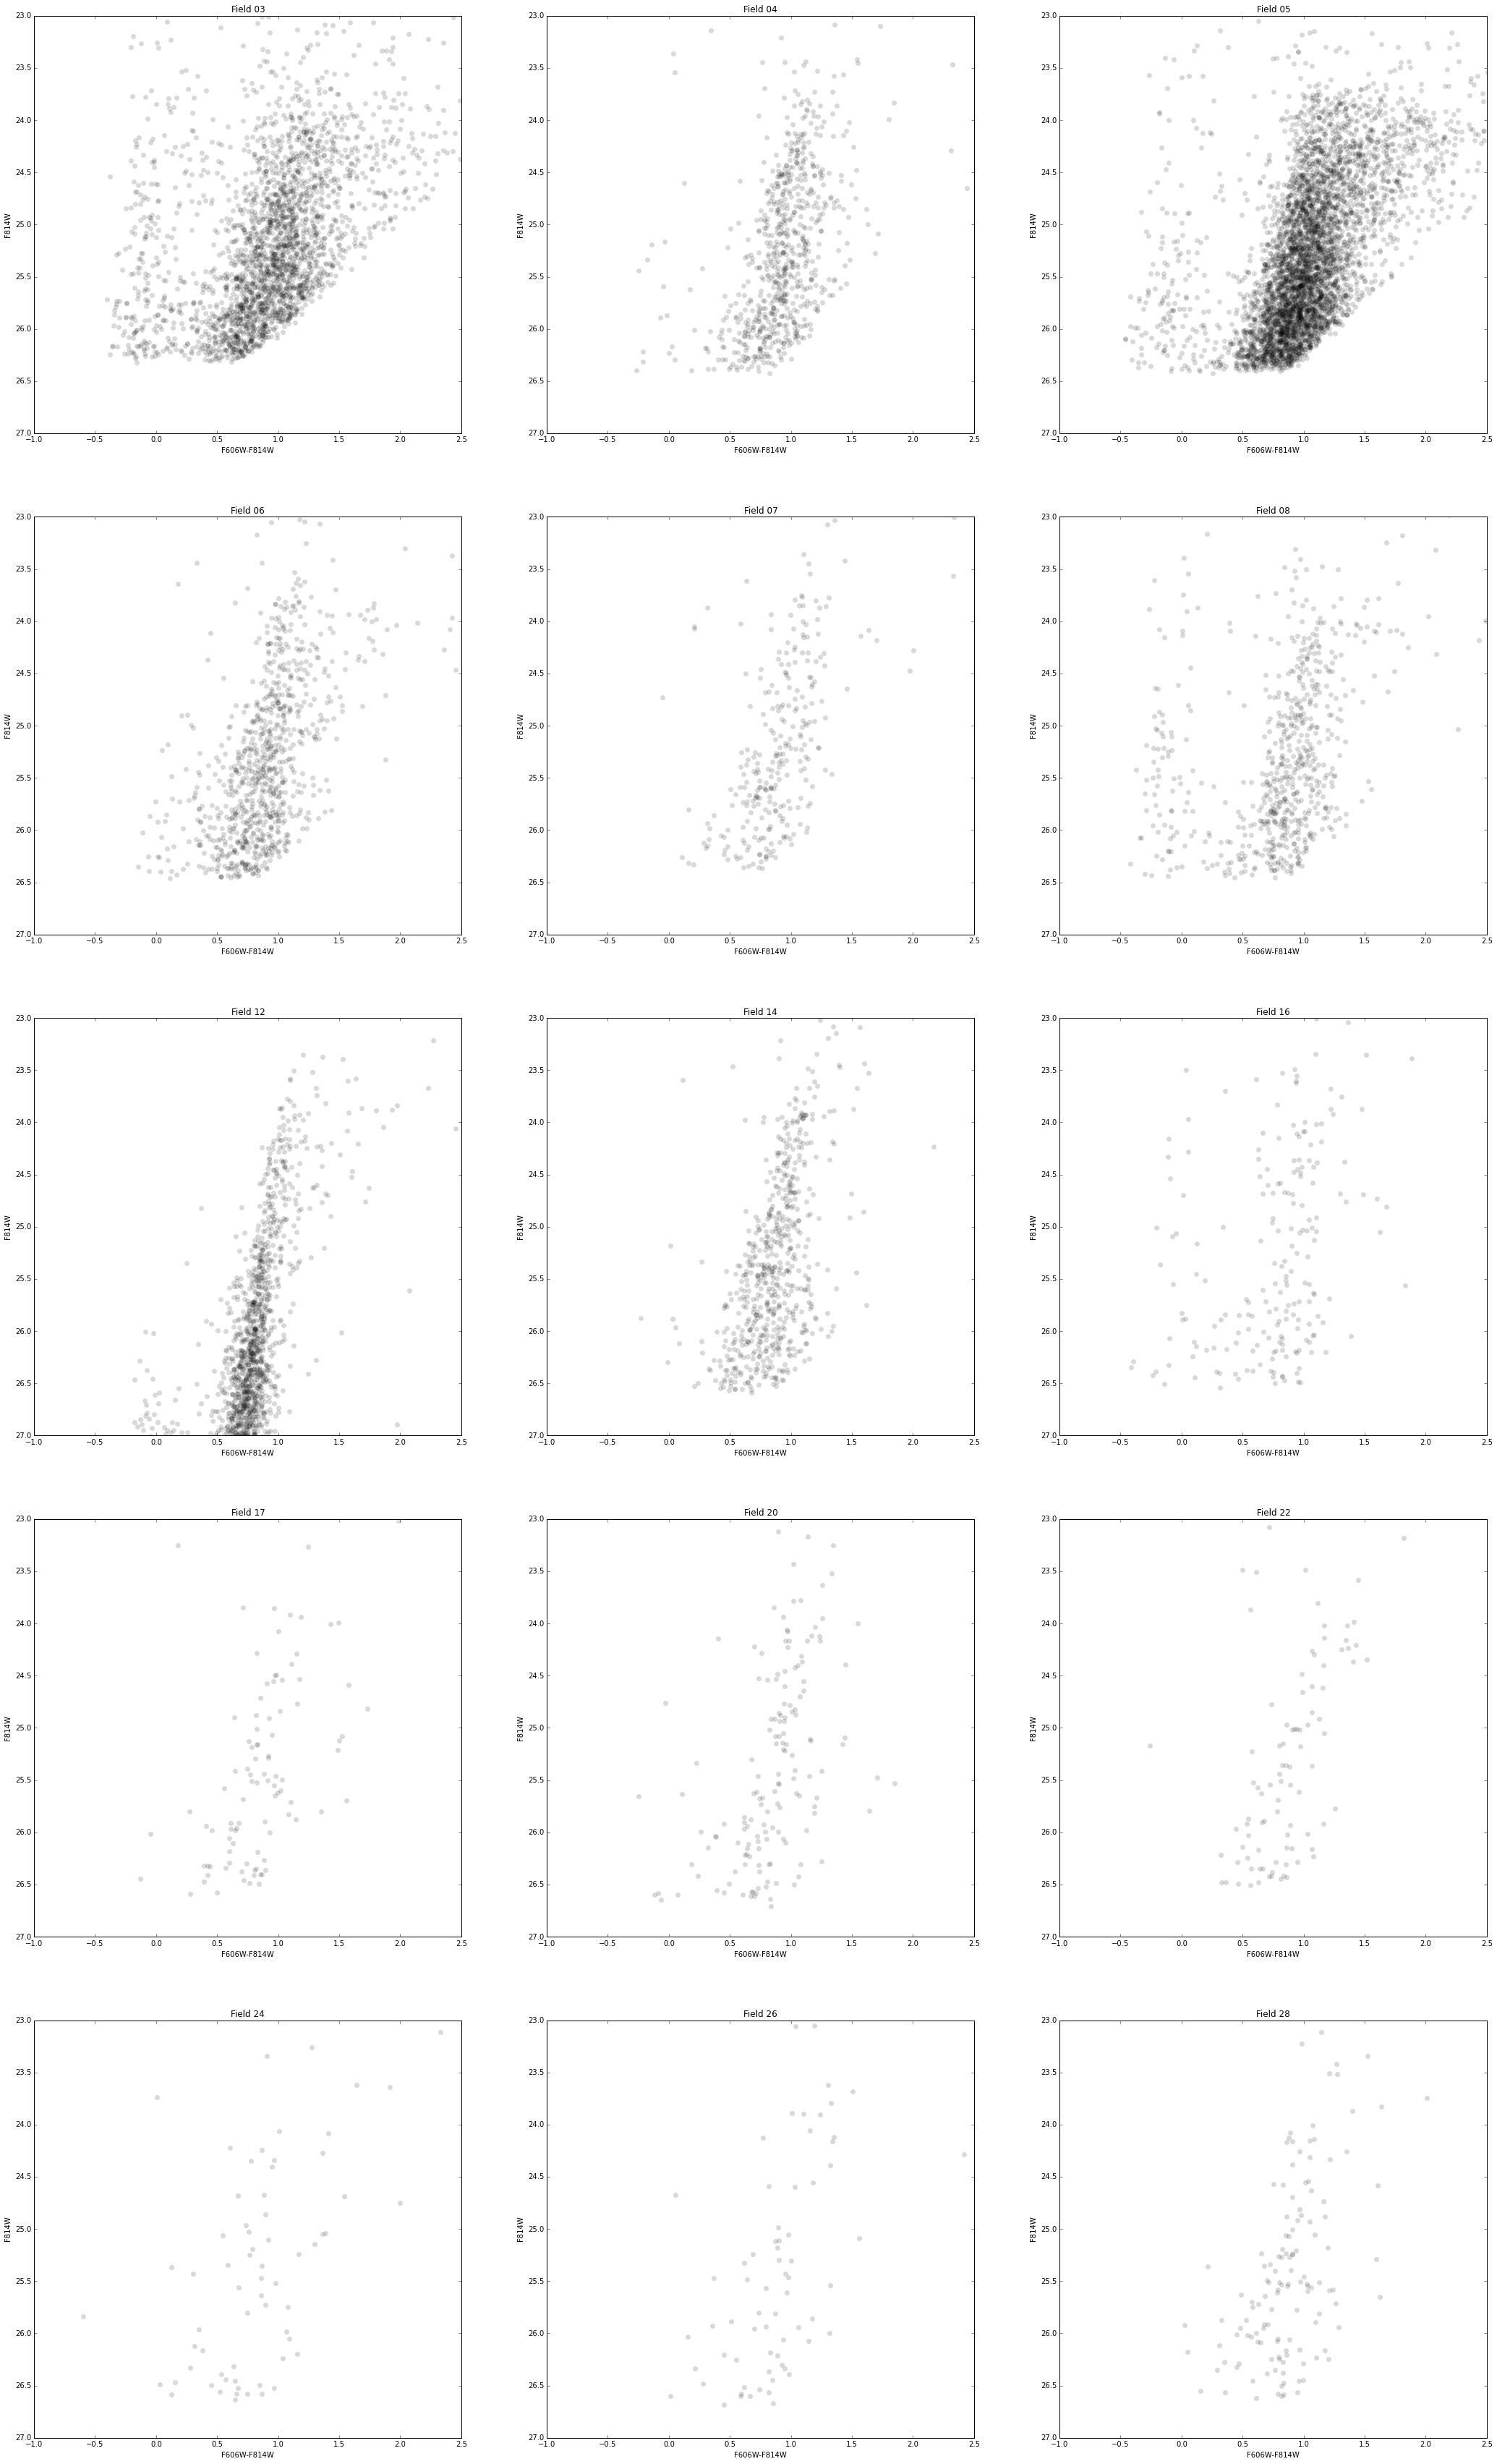

In [6]:
figure(figsize(36,60))

plt.subplot(5,3,1)
plot(f606_03-f814_03,f814_03, 'ko', alpha=0.15)
axis([-1,2.5,27,23])
xlabel('F606W-F814W')
ylabel('F814W')
plt.title('Field 03')

plt.subplot(5,3,2)
plot(f606_04-f814_04,f814_04, 'ko', alpha=0.15)
axis([-1,2.5,27,23])
xlabel('F606W-F814W')
ylabel('F814W')
plt.title('Field 04')

plt.subplot(5,3,3)
plot(f606_05-f814_05,f814_05, 'ko', alpha=0.15)
axis([-1,2.5,27,23])
xlabel('F606W-F814W')
ylabel('F814W')
plt.title('Field 05')

plt.subplot(5,3,4)
plot(f606_06-f814_06,f814_06, 'ko', alpha=0.15)
axis([-1,2.5,27,23])
xlabel('F606W-F814W')
ylabel('F814W')
plt.title('Field 06')

plt.subplot(5,3,5)
plot(f606_07-f814_07,f814_07, 'ko', alpha=0.15)
axis([-1,2.5,27,23])
xlabel('F606W-F814W')
ylabel('F814W')
plt.title('Field 07')

plt.subplot(5,3,6)
plot(f606_08-f814_08,f814_08, 'ko', alpha=0.15)
axis([-1,2.5,27,23])
xlabel('F606W-F814W')
ylabel('F814W')
plt.title('Field 08')

plt.subplot(5,3,7)
plot(f606_12-f814_12,f814_12, 'ko', alpha=0.15)
axis([-1,2.5,27,23])
xlabel('F606W-F814W')
ylabel('F814W')
plt.title('Field 12')

plt.subplot(5,3,8)
plot(f606_14-f814_14,f814_14, 'ko', alpha=0.15)
axis([-1,2.5,27,23])
xlabel('F606W-F814W')
ylabel('F814W')
plt.title('Field 14')

plt.subplot(5,3,9)
plot(f606_16-f814_16,f814_16, 'ko', alpha=0.15)
axis([-1,2.5,27,23])
xlabel('F606W-F814W')
ylabel('F814W')
plt.title('Field 16')

plt.subplot(5,3,10)
plot(f606_17-f814_17,f814_17, 'ko', alpha=0.15)
axis([-1,2.5,27,23])
xlabel('F606W-F814W')
ylabel('F814W')
plt.title('Field 17')

plt.subplot(5,3,11)
plot(f606_20-f814_20,f814_20, 'ko', alpha=0.15)
axis([-1,2.5,27,23])
xlabel('F606W-F814W')
ylabel('F814W')
plt.title('Field 20')

plt.subplot(5,3,12)
plot(f606_22-f814_22,f814_22, 'ko', alpha=0.15)
axis([-1,2.5,27,23])
xlabel('F606W-F814W')
ylabel('F814W')
plt.title('Field 22')

plt.subplot(5,3,13)
plot(f606_24-f814_24,f814_24, 'ko', alpha=0.15)
axis([-1,2.5,27,23])
xlabel('F606W-F814W')
ylabel('F814W')
plt.title('Field 24')

plt.subplot(5,3,14)
plot(f606_26-f814_26,f814_26, 'ko', alpha=0.15)
axis([-1,2.5,27,23])
xlabel('F606W-F814W')
ylabel('F814W')
plt.title('Field 26')

plt.subplot(5,3,15)
plot(f606_28-f814_28,f814_28, 'ko', alpha=0.15)
axis([-1,2.5,27,23])
xlabel('F606W-F814W')
ylabel('F814W')
plt.title('Field 28')


plt.show()

###Find the Blue Stars
[Select bright stars (for the sake of argument), then plot all stars up, and overplot the bright ones up in ra/dec in blue (the equivalent of longitude and latitude on the sky) space. RA has the amusing convention of being plotted backwards (because you're on the inside of the celestial sphere looking out, sigh).]

EDIT: I have selected what stars I have deemed to be both "bright" and "blue" and plotted them as bright blue circles. Those stars which are "blue" but not "bright" are dimmer blue circles, and the stars that are not blue at all are plotted faintly in red. Here are a couple of examples, where Field 6 (inner field) and Field 20 (outer field) are representative fields for the experiment.

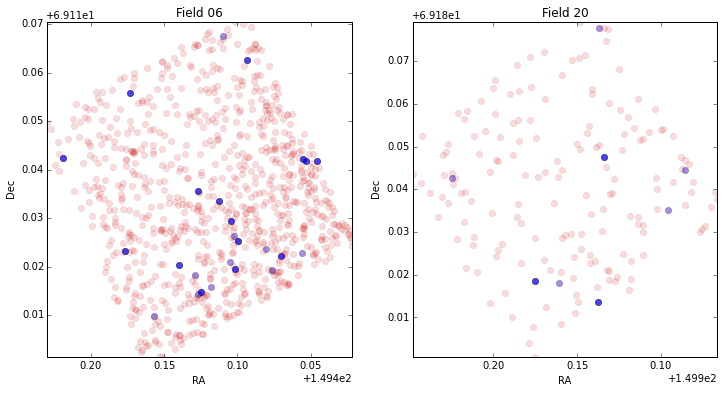

In [61]:
figure(figsize(12,6))

plt.subplot(1,2,1)
blue_06, = where (((-0.4) < (f606_06-f814_06)) & ((f606_06-f814_06) < (0.2)))
briblu_06, = where (((-0.4) < (f606_06-f814_06)) & ((f606_06-f814_06) < (0.2)) & ((23) < (f814_06)) & ((f814_06) < (26.2)))
plot(ra_06,dec_06,'ro',alpha=0.15)
plot(ra_06[blue_06],dec_06[blue_06],'bo',alpha=0.35)
plot(ra_06[briblu_06],dec_06[briblu_06],'bo',alpha=0.55)
axis([max(ra_06),min(ra_06),min(dec_06),max(dec_06)])
xlabel('RA')
ylabel('Dec')
plt.title('Field 06')

plt.subplot(1,2,2)
blue_20, = where (((-0.4) < (f606_20-f814_20)) & ((f606_20-f814_20) < (0.2)))
briblu_20, = where (((-0.4) < (f606_20-f814_20)) & ((f606_20-f814_20) < (0.2)) & ((23) < (f814_20)) & ((f814_20) < (26.2)))
plot(ra_20,dec_20,'ro',alpha=0.15)
plot(ra_20[blue_20],dec_20[blue_20],'bo',alpha=0.35)
plot(ra_20[briblu_20],dec_20[briblu_20],'bo',alpha=0.55)
axis([max(ra_20),min(ra_20),min(dec_20),max(dec_20)])
xlabel('RA')
ylabel('Dec')
plt.title('Field 20')

Now I have plotted all of the "bright blue" stars found in all of the "select" fields in the M81 GHOSTS data.

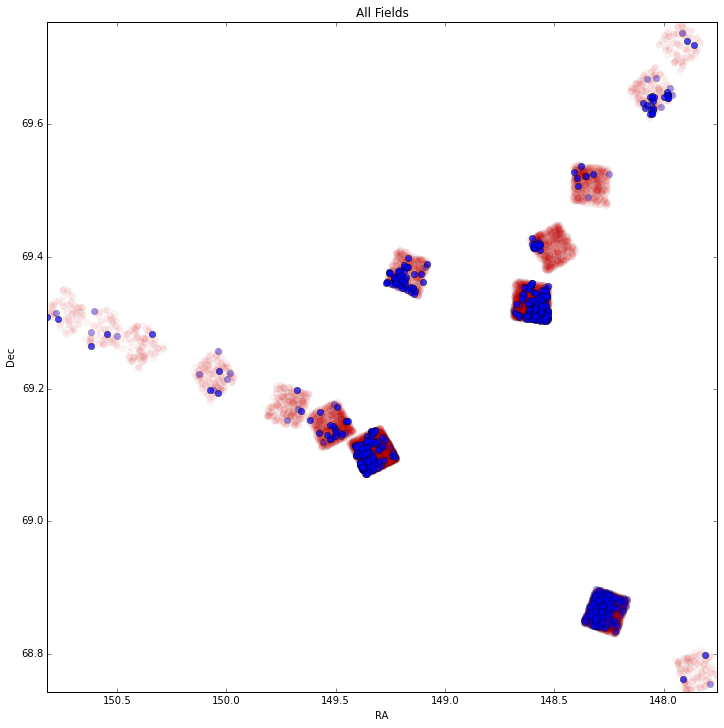

In [62]:
figure(figsize(12,12))
blue_all, = where (((-0.4) < (f606_all-f814_all)) & ((f606_all-f814_all) < (0.2)))
briblu_all, = where (((-0.4) < (f606_all-f814_all)) & ((f606_all-f814_all) < (0.2)) & ((23) < (f814_all)) & ((f814_all) < (26.2)))
plot(ra_all,dec_all, 'ro', alpha=.05)
plot(ra_all[blue_all],dec_all[blue_all],'bo',alpha=0.35)
plot(ra_all[briblu_all],dec_all[briblu_all],'bo',alpha=0.55)
axis([max(ra_all),min(ra_all),min(dec_all),max(dec_all)])
xlabel('RA')
ylabel('Dec')
plt.title('All Fields')

Now I want to start looking only at the stars in these fields which are both bright and blue, so I will make new arrays which pair down the old ones into just what I am interested in right now.

In [63]:
blue, = where (((-0.4) < (f606_all-f814_all)) & ((f606_all-f814_all) < (0.2)))
briblu, = where (((-0.4) < (f606_all-f814_all)) & ((f606_all-f814_all) < (0.2)) & ((23) < (f814_all)) & ((f814_all) < (26.2)))

ra_bb = ra_all[briblu]
dec_bb = dec_all[briblu]

print np.size(f606_all-f814_all), np.size(f814_all), "paired down to", np.size((f606_all-f814_all)[briblu]), np.size((f814_all)[briblu])

14652 14652 paired down to 478 478


figure(figsize(12,12))

briblu_00, = where (((-0.4) < (f606_00-f814_00)) & ((f606_00-f814_00) < (0.2)) & ((23) < (f814_00)) & ((f814_00) < (27)))
plot((f606_00-f814_00)[briblu_00],f814_00[briblu_00], 'bo', alpha=0.55)   # alpha=0.55 is to make it partly transparent; 'bo' is a blue circle
plot((f606_00-f814_00),f814_00, 'ro', alpha=0.15)
x1 = -0.4                  # these eight lines make the edges of the box
x2 = 0.2                   # these eight
y1 = 27                    # these eight
y2 = 23                    # these eight
plot((x1,x2),(y1,y1),'b-') # these eight
plot((x1,x2),(y2,y2),'b-') # these eight
plot((x1,x1),(y1,y2),'b-') # these eight
plot((x2,x2),(y1,y2),'b-') # these eight
axis([-1,2.5,27.25,22.75])
xlabel('F606W-F814W')
ylabel('F814W')
plt.title('Field 00 CMD ("Blue" Parameters Shown)')

plt.savefig('F00_CMD_blue_parameters_shown.png', dpi= 500, facecolor='w', bbox_inches= "tight", format='png', transparent=True)

In [64]:
def plotbox():
    """
    Plot a blue box showing the "Bright Blue Star" selection area.
    """
    x1 = -0.4
    x2 = 0.2
    y1 = 26.2
    y2 = 23
    plot((x1,x2),(y1,y1),'b-')
    plot((x1,x2),(y2,y2),'b-')
    plot((x1,x1),(y1,y2),'b-')
    plot((x2,x2),(y1,y2),'b-')

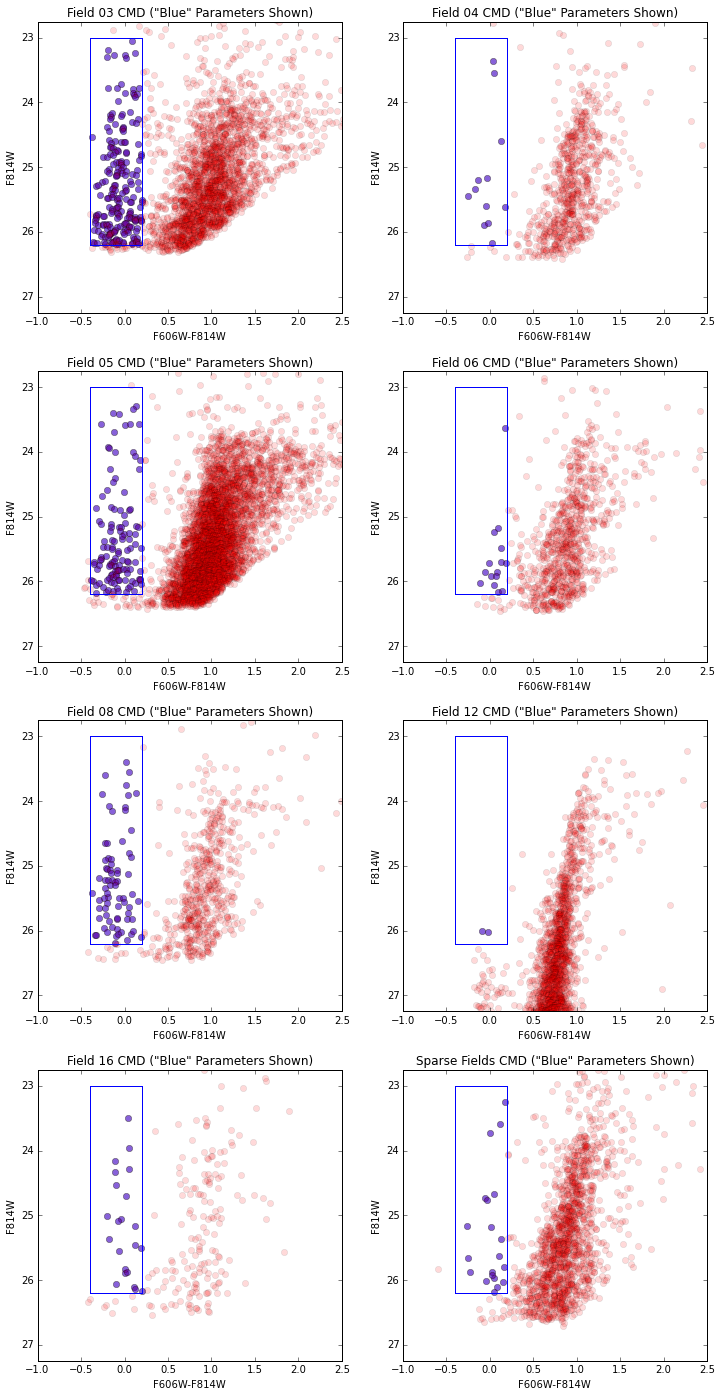

In [118]:
figure(figsize(12,24))

plt.subplot(4,2,1)
briblu_03, = where (((-0.4) < (f606_03-f814_03)) & ((f606_03-f814_03) < (0.2)) & ((23) < (f814_03)) & ((f814_03) < (26.2)))
plot((f606_03-f814_03)[briblu_03],f814_03[briblu_03], 'bo', alpha=0.55)   # alpha=0.55 is to make it partly transparent; 'bo' is a blue circle
plot((f606_03-f814_03),f814_03, 'ro', alpha=0.15)
plotbox()
axis([-1,2.5,27.25,22.75])
xlabel('F606W-F814W')
ylabel('F814W')
plt.title('Field 03 CMD ("Blue" Parameters Shown)')

plt.subplot(4,2,2)
briblu_04, = where (((-0.4) < (f606_04-f814_04)) & ((f606_04-f814_04) < (0.2)) & ((23) < (f814_04)) & ((f814_04) < (26.2)))
plot((f606_04-f814_04)[briblu_04],f814_04[briblu_04], 'bo', alpha=0.55)   # alpha=0.55 is to make it partly transparent; 'bo' is a blue circle
plot((f606_04-f814_04),f814_04, 'ro', alpha=0.15)
plotbox()
axis([-1,2.5,27.25,22.75])
xlabel('F606W-F814W')
ylabel('F814W')
plt.title('Field 04 CMD ("Blue" Parameters Shown)')

plt.subplot(4,2,3)
briblu_05, = where (((-0.4) < (f606_05-f814_05)) & ((f606_05-f814_05) < (0.2)) & ((23) < (f814_05)) & ((f814_05) < (26.2)))
plot((f606_05-f814_05)[briblu_05],f814_05[briblu_05], 'bo', alpha=0.55)   # alpha=0.55 is to make it partly transparent; 'bo' is a blue circle
plot((f606_05-f814_05),f814_05, 'ro', alpha=0.15)
plotbox()
axis([-1,2.5,27.25,22.75])
xlabel('F606W-F814W')
ylabel('F814W')
plt.title('Field 05 CMD ("Blue" Parameters Shown)')

plt.subplot(4,2,4)
briblu_06, = where (((-0.4) < (f606_06-f814_06)) & ((f606_06-f814_06) < (0.2)) & ((23) < (f814_06)) & ((f814_06) < (26.2)))
plot((f606_06-f814_06)[briblu_06],f814_06[briblu_06], 'bo', alpha=0.55)   # alpha=0.55 is to make it partly transparent; 'bo' is a blue circle
plot((f606_06-f814_06),f814_06, 'ro', alpha=0.15)
plotbox()
axis([-1,2.5,27.25,22.75])
xlabel('F606W-F814W')
ylabel('F814W')
plt.title('Field 06 CMD ("Blue" Parameters Shown)')

plt.subplot(4,2,5)
briblu_08, = where (((-0.4) < (f606_08-f814_08)) & ((f606_08-f814_08) < (0.2)) & ((23) < (f814_08)) & ((f814_08) < (26.2)))
plot((f606_08-f814_08)[briblu_08],f814_08[briblu_08], 'bo', alpha=0.55)   # alpha=0.55 is to make it partly transparent; 'bo' is a blue circle
plot((f606_08-f814_08),f814_08, 'ro', alpha=0.15)
plotbox()
axis([-1,2.5,27.25,22.75])
xlabel('F606W-F814W')
ylabel('F814W')
plt.title('Field 08 CMD ("Blue" Parameters Shown)')

plt.subplot(4,2,6)
briblu_12, = where (((-0.4) < (f606_12-f814_12)) & ((f606_12-f814_12) < (0.2)) & ((23) < (f814_12)) & ((f814_12) < (26.2)))
plot((f606_12-f814_12)[briblu_12],f814_12[briblu_12], 'bo', alpha=0.55)   # alpha=0.55 is to make it partly transparent; 'bo' is a blue circle
plot((f606_12-f814_12),f814_12, 'ro', alpha=0.15)
plotbox()
axis([-1,2.5,27.25,22.75])
xlabel('F606W-F814W')
ylabel('F814W')
plt.title('Field 12 CMD ("Blue" Parameters Shown)')

plt.subplot(4,2,7)
briblu_16, = where (((-0.4) < (f606_16-f814_16)) & ((f606_16-f814_16) < (0.2)) & ((23) < (f814_16)) & ((f814_16) < (26.2)))
plot((f606_16-f814_16)[briblu_16],f814_16[briblu_16], 'bo', alpha=0.55)   # alpha=0.55 is to make it partly transparent; 'bo' is a blue circle
plot((f606_16-f814_16),f814_16, 'ro', alpha=0.15)
plotbox()
axis([-1,2.5,27.25,22.75])
xlabel('F606W-F814W')
ylabel('F814W')
plt.title('Field 16 CMD ("Blue" Parameters Shown)')

plt.subplot(4,2,8)
briblu_SF, = where (((-0.4) < (f606_SF-f814_SF)) & ((f606_SF-f814_SF) < (0.2)) & ((23) < (f814_SF)) & ((f814_SF) < (26.2)))
plot((f606_SF-f814_SF)[briblu_SF],f814_SF[briblu_SF], 'bo', alpha=0.55)   # alpha=0.55 is to make it partly transparent; 'bo' is a blue circle
plot((f606_SF-f814_SF),f814_SF, 'ro', alpha=0.15)
plotbox()
axis([-1,2.5,27.25,22.75])
xlabel('F606W-F814W')
ylabel('F814W')
plt.title('Sparse Fields CMD ("Blue" Parameters Shown)')


#plt.savefig('Many_CMDs_blue_parameters_shown.png', dpi= 503, facecolor='w', bbox_inches= "tight", format='png', transparent=True)

###Neutral Hydrogen Data Comes In
We now have decided to start looking at the correlation between HI density and new star formation. In order to do this, we have retrieved a fits file containing a data map of HI from the M81 Group, from Min Yun (c. 1990s?). This fits file came with a data cube of pixels, each with three values/dimensions: RA, Dec, and Frequency, as well as a mapped value of HI density at each one of these locations. We only care about the first two dimensions, so we toss out the frequency. Then we do some checking with the data we have left.

In [67]:
#open fits file and get HI data cube
hdulist = fits.open('M81HIM0.fits')
primary_hdu = hdulist[0]
M81_HI = primary_hdu.data[0,:,:] #only want RA and dec, not frequency from first col
hdr = primary_hdu.header

w = WCS(hdr, naxis=[1,2])

In [68]:
#checking on some things
hdulist.info()

print w.naxis
print M81_HI.shape
print M81_HI[245, 245] #0 indexing
print median(M81_HI), mean(M81_HI)

Filename: M81HIM0.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU     367   (579, 687, 1)   float32   
2
(687L, 579L)
50.9443
0.0 131.973


In [69]:
#primary_hdu.header

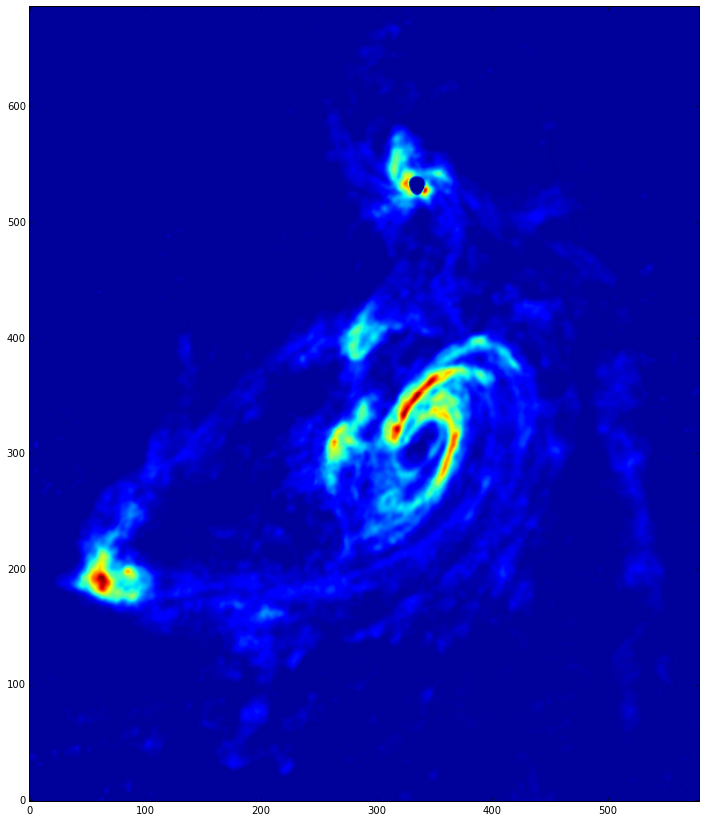

In [70]:
plt.imshow(M81_HI, origin='lower')

Now, I've created a few python lists, which will each be made to contain--from each pixel in the HI image--the right ascension, the declination, and the associated HI density value. Using the pix2world function, the RA and Dec values can easily be extracted from the fits file, based on data stored in the header. It's important to note that these coordinates that come out are out of date, since this HI data was taken when the 1950 coords were still the standard.

In [71]:
pixra = list()
pixdec = list()
pixdata = list()
pixgrid = list()
radecindex = 0
imax = len(M81_HI[1,:])/1
jmax = len(M81_HI[:,1])/1
for i in range(imax):
    for j in range(jmax):
        w_ra, w_dec = w.all_pix2world(i, j, 0)
        val = M81_HI[j, i]
        pixra.append(w_ra)
        pixdec.append(w_dec)
        pixdata.append(val)
        point = [i, j]
        pixgrid.append(point)
        radecindex = radecindex+1
        
        
        #plot(x="w_ra", y="w_dec", data={w_ra} fmt='k.')#, color=val)

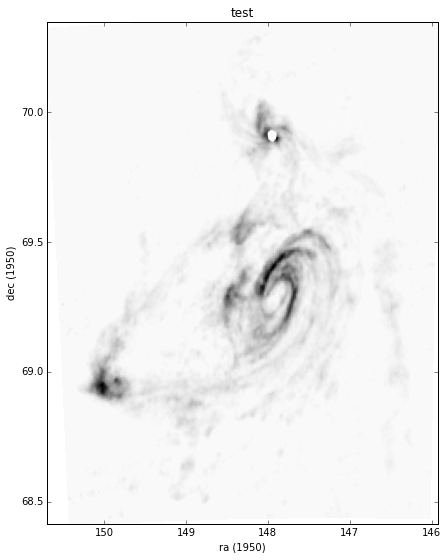

In [72]:
figure(figsize(579/74, 687/74))
plt.scatter(x=pixra, y=pixdec, c=pixdata, marker=',', edgecolors='none', cmap=matplotlib.cm.gray_r)
axis([max(pixra),min(pixra),min(pixdec),max(pixdec)])
xlabel('ra (1950)')
ylabel('dec (1950)')
plt.title('test')

Now we feed the lists of coordinates into the SkyCoord function, telling it that the standard for them is fk4 (1950), so that we can convert it to ICRS (2000) in order for it to be comparable to our other data.

In [73]:
HI_sc_fk4 = SkyCoord(ra=pixra, dec=pixdec, unit=(u.deg, u.deg), frame='fk4')

In [74]:
HI_sc_icrs = HI_sc_fk4.transform_to('icrs')

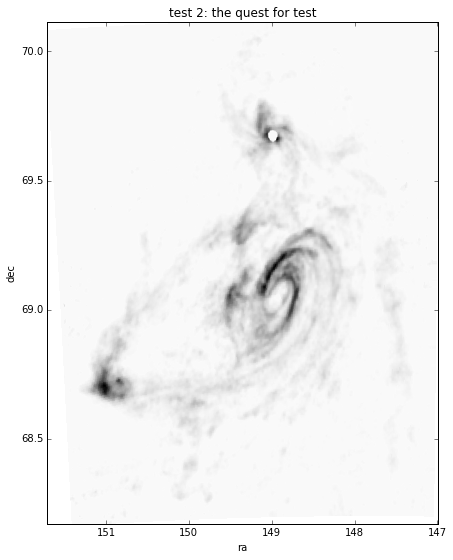

In [75]:
figure(figsize(579/74, 687/74))
plt.scatter(x=HI_sc_icrs.ra.deg, y=HI_sc_icrs.dec.deg, c=pixdata, marker=',', edgecolors='none', cmap=matplotlib.cm.gray_r)
axis([max(HI_sc_icrs.ra.deg),min(HI_sc_icrs.ra.deg),min(HI_sc_icrs.dec.deg),max(HI_sc_icrs.dec.deg)])
xlabel('ra')
ylabel('dec')
plt.title('test 2: the quest for test')

Finally, overlay the previously selected blue stars onto the HI map that we now have, to get an idea of how things line up.

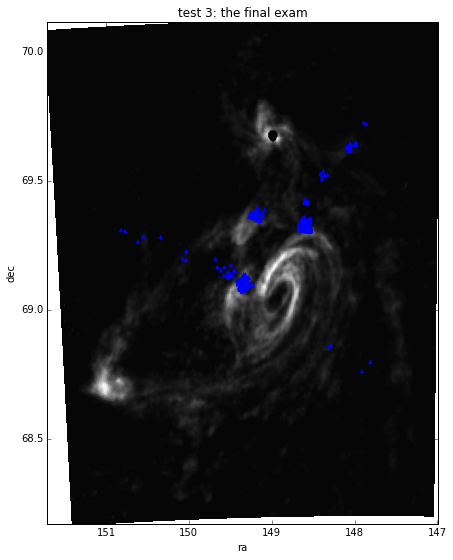

In [76]:
figure(figsize(579/74, 687/74))
plt.scatter(x=HI_sc_icrs.ra.deg, y=HI_sc_icrs.dec.deg, c=pixdata, marker=',', edgecolors='none', cmap=matplotlib.cm.gray)
plt.scatter(x=ra_bb, y=dec_bb, c='b', marker='^', edgecolors='none')
axis([max(max(ra_bb),max(HI_sc_icrs.ra.deg)),min(min(ra_bb),min(HI_sc_icrs.ra.deg)),min(min(dec_bb),min(HI_sc_icrs.dec.deg)),max(max(dec_bb),max(HI_sc_icrs.dec.deg))])
xlabel('ra')
ylabel('dec')
plt.title('test 3: the final exam')

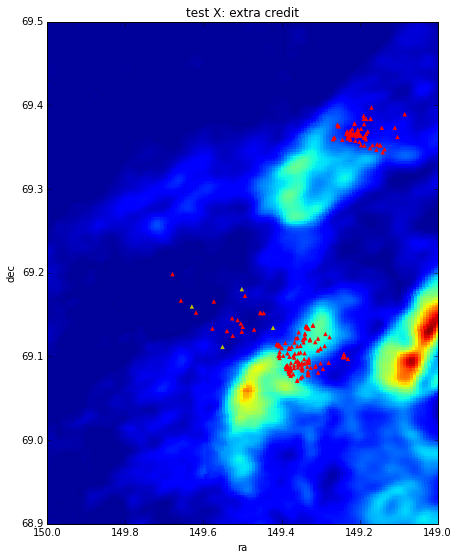

In [77]:
figure(figsize(579/74, 687/74))
plt.scatter(x=HI_sc_icrs.ra.deg, y=HI_sc_icrs.dec.deg, c=pixdata, marker=',', edgecolors='none')#, cmap=matplotlib.cm.gray_r)
plt.scatter(x=ra_bb, y=dec_bb, c='r', marker='^', edgecolors='none')
axis([150,149,68.9,69.5])
xlabel('ra')
ylabel('dec')
plt.title('test X: extra credit')

plt.scatter(x=[149.42190382894037, 149.50164225940227, 149.62956866112077, 149.55122968105596], y=[69.134215689782877, 69.180407796251416, 69.159620110498039, 69.111420555167058], c='y', marker='^', edgecolors='none')

In [78]:
print (56.0/3600)*(62.0/3600)
print (60.0/3600)*(60.0/3600)

print (4*np.log(2))

0.000267901234568
0.000277777777778
2.77258872224


In [79]:
CDELT2  =      2.777777845E-03
print "CDELT2 is", CDELT2, "deg"
CDELT2_rad = np.deg2rad(CDELT2)

M81_D = 3.62 #dist to M81 in Mpc
beam_HPW_deg = (1.0/60) #Half Power Width is about 60" = 1' = 1/60 deg
beam_HPW_rad = deg2rad(beam_HPW_deg)
print "beam HPW is", beam_HPW_rad, "rad"

beam_r = (beam_HPW_rad/2)
beam_r1 = deg2rad((56.0/3600))/2
beam_r2 = deg2rad((62.0/3600))/2
omeg_num = (pi*beam_r1*beam_r2)#(pi*(beam_r*beam_r))
omeg_den = (np.log(2))

#omeg_r = 2*M81_D*1000*(sin(beam_HPW_rad/2.0))
#omega_kpc2 = pi*(omeg_r*omeg_r)
#print "supposed beam size is", omega_kpc2, "sq kpc"

beam_size_sr = (omeg_num/omeg_den)*(3.17/4) #fudge
print "beam size is", beam_size_sr, "sr"

#print HI_sc_icrs.ra.deg[0]
#print HI_sc_icrs.ra.rad[0]
#print HI_sc_icrs.ra.deg[1]
#print HI_sc_icrs.ra.rad[1]

#print HI_sc_icrs.dec.deg[0]
#print HI_sc_icrs.dec.rad[0]
#print HI_sc_icrs.dec.deg[1]
#print HI_sc_icrs.dec.rad[1]

pix_w_deg4 = pixra[1] - pixra[0]
pix_h_deg4 = pixdec[1] - pixdec[0]
pix_w_rad4 = np.deg2rad(pix_w_deg4)
pix_h_rad4 = np.deg2rad(pix_h_deg4)

#print (1.0/60)
#print "pix w in old deg:", pix_w_deg4
#print "pix h in old deg:", pix_h_deg4
#print "pix w in old rad:", pix_w_rad4
#print "pix h in old rad:", pix_h_rad4

pix_w_deg = HI_sc_icrs.ra.deg[1] - HI_sc_icrs.ra.deg[0]
pix_h_deg = HI_sc_icrs.dec.deg[1] - HI_sc_icrs.dec.deg[0]
pix_w_rad = HI_sc_icrs.ra.rad[1] - HI_sc_icrs.ra.rad[0]
pix_h_rad = HI_sc_icrs.dec.rad[1] - HI_sc_icrs.dec.rad[0]

pix_h_sin = sin(HI_sc_icrs.dec.rad[1]) - sin(HI_sc_icrs.dec.rad[0])
pix_h_sin_C = sin(deg2rad(CDELT2))

#print (1.0/60)
#print "pix w in new deg:", pix_w_deg
#print "pix h in new deg:", pix_h_deg
#print "pix w in new rad:", pix_w_rad #conversion from above deg checks out
#print "pix h in new rad:", pix_h_rad #checks out

#print "sin of h", pix_h_sin, "rad"
#print "better sin of h", pix_h_sin_C, "rad"

#?
pix_size_sr = pix_h_sin_C*CDELT2_rad##
print "each pixel is", pix_size_sr, "steradians"

#?
pix_per_beam = beam_size_sr / pix_size_sr
print "each beam contains", pix_per_beam, "pixels"

pix_w_kpc = ( tan(deg2rad(CDELT2)) * (M81_D*1000) )
pix_h_kpc = ( tan(deg2rad(CDELT2)) * (M81_D*1000) )
pix_size_kpc2 = pix_w_kpc*pix_h_kpc
print "each pixel is", pix_size_kpc2, "square kpc"

beam_size_kpc2 = pix_per_beam*pix_size_kpc2
print "each beam is", beam_size_kpc2, "square kpc"

#rsqr = ( tan(deg2rad(CDELT2)) * (M81_D*1000) )
#bskpc2 = (pi*rsqr)

D_squared = M81_D*M81_D
pix_weight = (1/pix_per_beam)
print "pix_weight =", pix_weight
dens_coef = (((2.36e+5)*D_squared)/1000) #mult this coef by val in Jy m/s to get solar masses

CDELT2 is 0.002777777845 deg
beam HPW is 0.000290888208666 rad
beam size is 7.32812960028e-08 sr
each pixel is 2.35044316675e-09 steradians
each beam contains 31.1776506828 pixels
each pixel is 0.0308011474947 square kpc
each beam is 0.96030741722 square kpc
pix_weight = 0.0320742576204


In [80]:
i = 0
j = 0
news = 0

for i in range(687):
    for j in range(579):
        newv = (M81_HI[i][j])*pix_weight #value of pixel in Jy m/s
        pix_cont = dens_coef*newv
        news+= pix_cont

print news, "should be approx."
print 5.2e+9

#print M81_HI[10][200]
#baseline = (dens_coef*( (M81_HI[10][200])/beam_size_kpc2) )
#print baseline

#print M81_HI[10]

#avgboi = (2.30095327e-01 + 1.09814608e+00 + 7.93476820e+00 + 1.60709000e+01
# + 2.04557323e+01 + 1.83094196e+01 + 1.40219488e+01 + 1.04222507e+01
# + 1.14890823e+01 + 1.31500330e+01 + 3.62510185e+01 + 5.55861740e+01
# + 8.38424530e+01 + 8.42182922e+01 + 6.48751907e+01 + 2.81704445e+01
# + -1.27291417e+00 + 1.78726017e+00 + 2.30656605e+01 + 2.66621189e+01
# + 4.22737808e+01 + 9.48873672e+01 + 1.08149162e+02 + 1.10649117e+02
# + 1.43386887e+02 + 1.44065979e+02 + 8.73752823e+01 + 4.40616951e+01
# + 2.78554268e+01 + 2.52085361e+01 + 1.17882538e+01 + -9.95964587e-01
# + 0.00000000e+00 + 0.00000000e+00 + 0.00000000e+00 + 2.36285403e-02
# + -1.10311575e-01 + -1.57782626e+00 + 4.28341293e+00 + 2.11848030e+01
# + 1.92305965e+01 + 1.52797070e+01 + 1.19352837e+01 + 7.00200319e+00
# + -5.68054020e-01)/45

#newbase = (dens_coef*( (avgboi)/beam_size_kpc2) )
#print newbase

#per_kpc = 3.2e16/9.521e+38
#print per_kpc

5207204449.77 should be approx.
5200000000.0


In [81]:
soo = 0.0
for i in range(687):
    for j in range(579):
        newv = M81_HI[i][j]
        soo+= newv

print soo

woo = soo*pix_weight
too = (dens_coef*woo)
print too, "should be approx."
print 5.2e+9

52495112.7067
5207204449.77 should be approx.
5200000000.0


correct_tot = 5.2e+9
alm_cor = correct_tot/dens_coef
cor_weight = alm_cor/soo
cor_ppb = (1/cor_weight)
cor_bs_sr = cor_ppb*pix_size_sr
print "the correct beam size is approx.", cor_bs_sr, "steradians"

cor_r = np.sqrt((cor_bs_sr*(4*np.log(2)))/pi)
print cor_r
print np.rad2deg(cor_r)

###New World Order

In [82]:
bb_x, bb_y = w.all_world2pix(ra_bb, dec_bb, 0)

# Find the nearest integer pixel
bb_x = np.round(bb_x).astype(int)
bb_y = np.round(bb_y).astype(int)

In [83]:
print np.size(bb_x)
print np.size(bb_y)

#print bb_x
#print bb_y

478
478


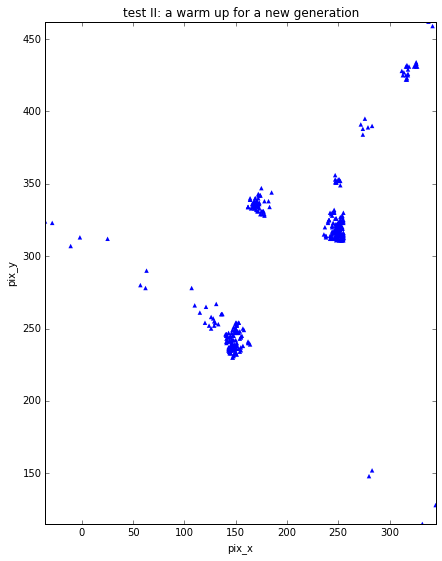

In [84]:
figure(figsize(579/74, 687/74))
plt.scatter(x=bb_x, y=bb_y, c='b', marker='^', edgecolors='none')
axis([min(bb_x),max(bb_x),min(bb_y),max(bb_y)])
xlabel('pix_x')
ylabel('pix_y')
plt.title('test II: a warm up for a new generation')

figure(figsize(579/74, 687/74))

plt.scatter(x_06,y_06, color='c')
plt.scatter(x_06_v,y_06_v, color='k')
axis([min(x_06)-10,max(x_06)+10,min(y_06)-10,max(y_06)+10])

In [85]:
#figure(figsize(579/74, 687/74))

#a, b, c, d = np.argmin(ra_06),  np.argmax(dec_06), np.argmax(ra_06), np.argmin(dec_06)
A = (147.5, 70.0)
B = (147.4, 70.01)
C = (147.3, 70.0)
D = (147.4, 69.99)

#plt.scatter([A[0],B[0],C[0],D[0]],[A[1],B[1],C[1],D[1]])
print A, B, C, D
#axis([max(ra_select),min(ra_select),min(dec_select),max(dec_select)])


#all06_sc_icrs = SkyCoord(ra=ra_06, dec=dec_06, unit=(u.deg, u.deg), frame='icrs')
#all06_sc_fk4 = all06_sc_icrs.transform_to('fk4')

vtest_sc_icrs = SkyCoord(ra=[A[0],B[0],C[0],D[0]], dec=[A[1],B[1],C[1],D[1]], unit=(u.deg, u.deg), frame='icrs')
vtest_sc_fk4 = vtest_sc_icrs.transform_to('fk4')


#x_06, y_06 = w.all_world2pix(all06_sc_fk4.ra, all06_sc_fk4.dec, 0)

x_test_v, y_test_v = w.all_world2pix(vtest_sc_fk4.ra, vtest_sc_fk4.dec, 0)

# Find the nearest integer pixel
#x_06 = np.round(x_06).astype(int)
#y_06 = np.round(y_06).astype(int)

x_test_v = np.round(x_test_v).astype(int)
y_test_v = np.round(y_test_v).astype(int)

(147.5, 70.0) (147.4, 70.01) (147.3, 70.0) (147.4, 69.99)


In [86]:
vert_test = [[x_test_v[0],y_test_v[0]], [x_test_v[1],y_test_v[1]], [x_test_v[2],y_test_v[2]], [x_test_v[3],y_test_v[3]]]
print vert_test

poly_test = Polygon.Polygon(vert_test)

truth_table = list()
for p in range(len(pixgrid)):
    t = poly_test.isInside(pixgrid[p][0],pixgrid[p][1])
    truth_table.append(t)

in_poly_test, = where(truth_table)
#print in_poly_06
just_poly_test = list()
for i in in_poly_test:
     just_poly_test.append(pixgrid[i])
#print just_poly_06

pix_test_x = list()
pix_test_y = list()
HI_poly_test = list()
for c in range(len(just_poly_test)):
    new_x = just_poly_test[c][0]
    new_y = just_poly_test[c][1]
    pix_test_x.append(new_x)
    pix_test_y.append(new_y)
    HI_poly_test.append(M81_HI[new_y][new_x])
#print np.sort(HI_poly_06)

print median(HI_poly_test), mean(HI_poly_test)

[[517, 645], [529, 648], [541, 645], [529, 641]]
0.0 0.0


In [87]:
def make_poly(ra_00, dec_00, pgrid, makeplots):
    """
    Make a Polygon type object that is the shape of the chosen field; returns this Polygon, its vertex coords, and pixel component lists
    """
    
    ###Phase 1###
    #figure(figsize(579/74, 687/74))

    a, b, c, d = np.argmin(ra_00), np.argmax(dec_00), np.argmax(ra_00), np.argmin(dec_00)
    A = (ra_00[a], dec_00[a])
    B = (ra_00[b], dec_00[b])
    C = (ra_00[c], dec_00[c])
    D = (ra_00[d], dec_00[d])

    #plt.scatter([A[0],B[0],C[0],D[0]],[A[1],B[1],C[1],D[1]])
    #print A, B, C, D
    #axis([max(ra_select),min(ra_select),min(dec_select),max(dec_select)])


    all00_sc_icrs = SkyCoord(ra=ra_00, dec=dec_00, unit=(u.deg, u.deg), frame='icrs')
    all00_sc_fk4 = all00_sc_icrs.transform_to('fk4')

    v00_sc_icrs = SkyCoord(ra=[A[0],B[0],C[0],D[0]], dec=[A[1],B[1],C[1],D[1]], unit=(u.deg, u.deg), frame='icrs')
    v00_sc_fk4 = v00_sc_icrs.transform_to('fk4')

    
    x_00, y_00 = w.all_world2pix(all00_sc_fk4.ra, all00_sc_fk4.dec, 0)

    x_00_v, y_00_v = w.all_world2pix(v00_sc_fk4.ra, v00_sc_fk4.dec, 0)

    # Find the nearest integer pixel
    x_00 = np.round(x_00).astype(int)
    y_00 = np.round(y_00).astype(int)

    x_00_v = np.round(x_00_v).astype(int)
    y_00_v = np.round(y_00_v).astype(int)
    
    
    
    ###Phase 2###
    vert_00 = [[x_00_v[0],y_00_v[0]], [x_00_v[1],y_00_v[1]], [x_00_v[2],y_00_v[2]], [x_00_v[3],y_00_v[3]]]
    print "vertices are", vert_00

    poly_00 = Polygon.Polygon(vert_00)

    truth_table = list()
    for p in range(len(pixgrid)):
        t = poly_00.isInside(pixgrid[p][0],pixgrid[p][1])
        truth_table.append(t)

    in_poly_00, = where(truth_table)
    #print in_poly_00
    just_poly_00 = list()
    for i in in_poly_00:
         just_poly_00.append(pixgrid[i])
    #print just_poly_00

    pix_00_x = list()
    pix_00_y = list()
    HI_poly_00 = list()
    for c in range(len(just_poly_00)):
        new_x = just_poly_00[c][0]
        new_y = just_poly_00[c][1]
        pix_00_x.append(new_x)
        pix_00_y.append(new_y)
        HI_poly_00.append(M81_HI[new_y][new_x])
    #print np.sort(HI_poly_00)

    print "median:", median(HI_poly_00)
    print "mean:", mean(HI_poly_00)
    
    
    
    ###Phase 3###
    if(makeplots):
        figure(figsize(579*2/74,687/74))

        plt.subplot(1,2,1)
        plt.imshow(M81_HI, origin='lower')
        plt.scatter(x=x_00_v, y=y_00_v, c='k', marker='s')
        axis([min(pix_00_x)-10,max(pix_00_x)+10,min(pix_00_y)-10,max(pix_00_y)+10])


        plt.subplot(1,2,2)
        plt.scatter(x=pix_00_x, y=pix_00_y, c=HI_poly_00)
        axis([min(pix_00_x)-10,max(pix_00_x)+10,min(pix_00_y)-10,max(pix_00_y)+10])
    
    return HI_poly_00, x_00_v, y_00_v, pix_00_x, pix_00_y

vertices are [[388, 405], [369, 416], [367, 398], [386, 394]]
median: 279.461
mean: 481.79


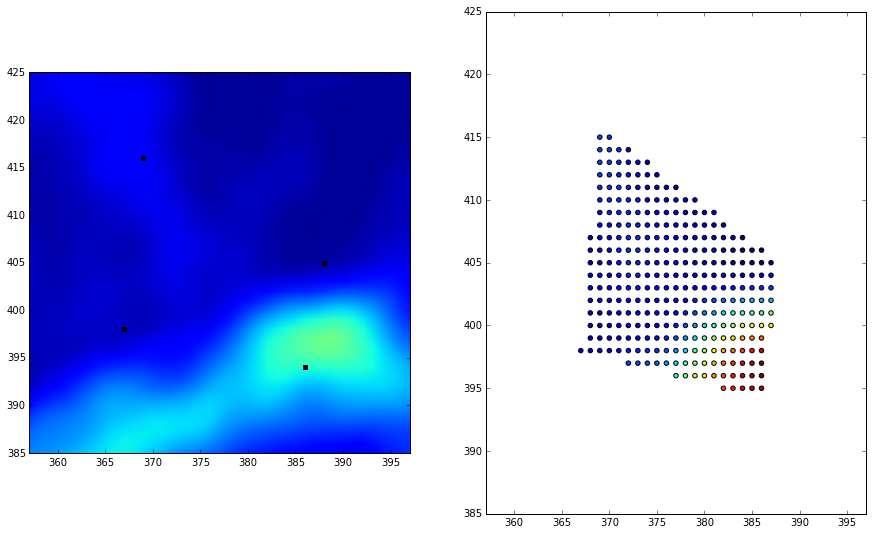

In [88]:
HI_poly_03, x_03_v, y_03_v, pix_03_x, pix_03_y = make_poly(ra_03, dec_03, pixgrid, True)

vertices are [[403, 432], [392, 447], [376, 438], [387, 421]]
median: 33.6994
mean: 61.5271


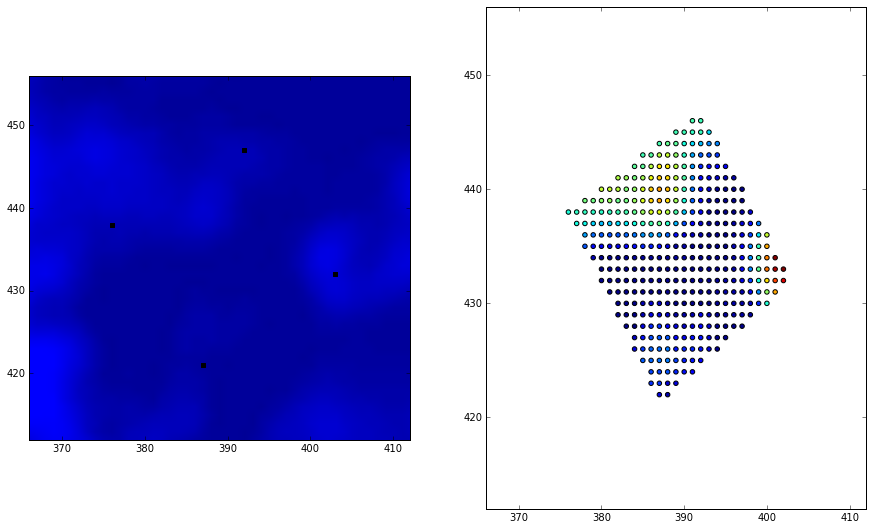

In [89]:
HI_poly_04, x_04_v, y_04_v, pix_04_x, pix_04_y = make_poly(ra_04, dec_04, pixgrid, True)

vertices are [[297, 321], [288, 338], [270, 330], [278, 312]]
median: 1489.1
mean: 1367.47


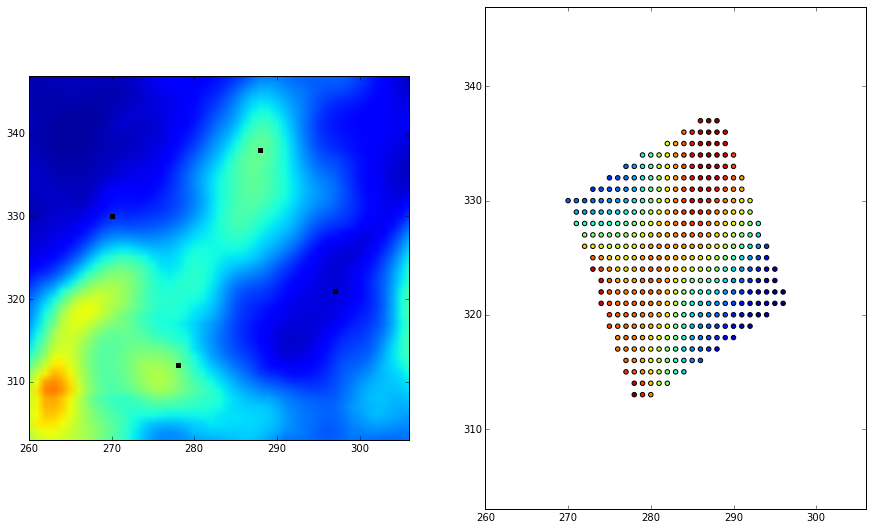

In [90]:
HI_poly_05, x_05_v, y_05_v, pix_05_x, pix_05_y = make_poly(ra_05, dec_05, pixgrid, True)

vertices are [[272, 336], [262, 352], [246, 345], [255, 328]]
median: 110.225
mean: 105.55


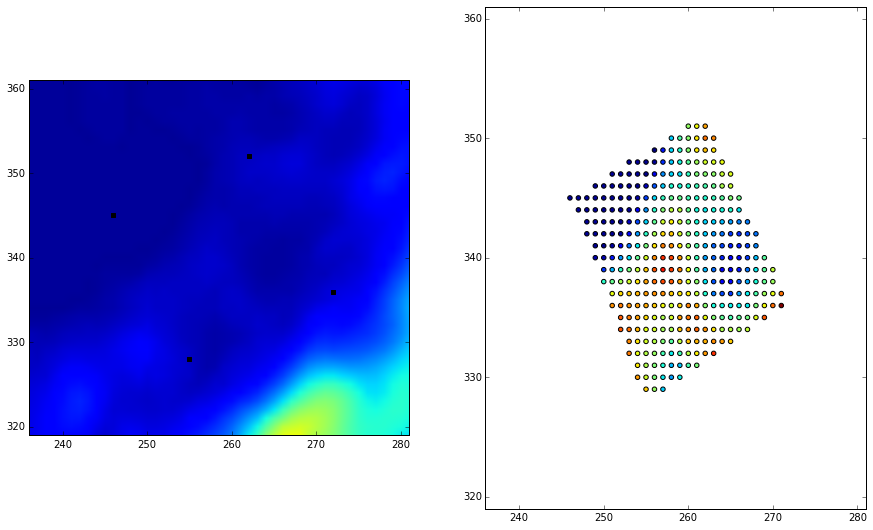

In [91]:
HI_poly_06, x_06_v, y_06_v, pix_06_x, pix_06_y = make_poly(ra_06, dec_06, pixgrid, True)

vertices are [[318, 427], [302, 434], [293, 416], [312, 409]]
median: 457.155
mean: 485.563


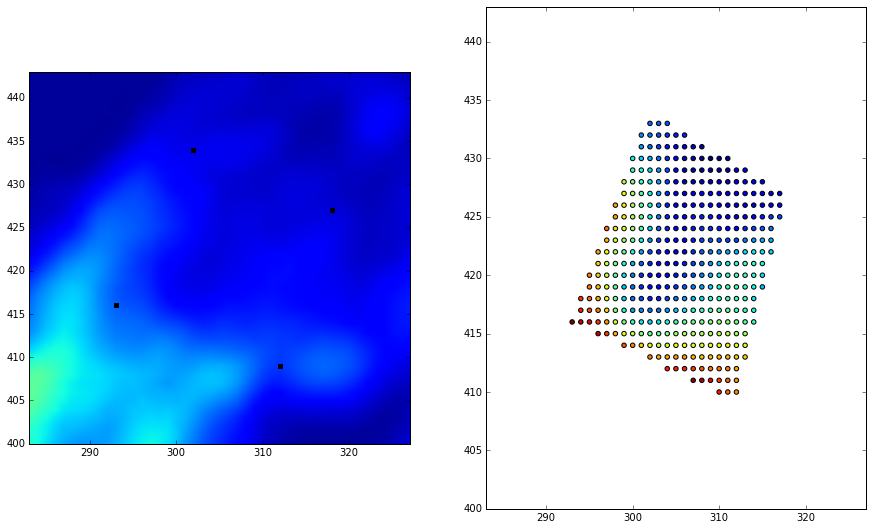

In [92]:
HI_poly_08, x_08_v, y_08_v, pix_08_x, pix_08_y = make_poly(ra_08, dec_08, pixgrid, True)

vertices are [[432, 242], [414, 248], [406, 230], [425, 223]]
median: 219.466
mean: 228.648


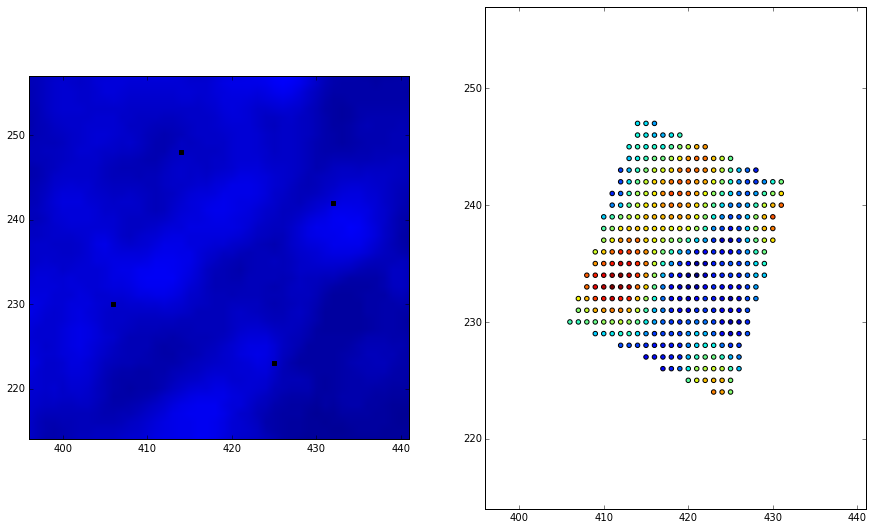

In [93]:
HI_poly_12, x_12_v, y_12_v, pix_12_x, pix_12_y = make_poly(ra_12, dec_12, pixgrid, True)

vertices are [[460, 518], [450, 532], [435, 519], [446, 504]]
median: 189.244
mean: 193.66


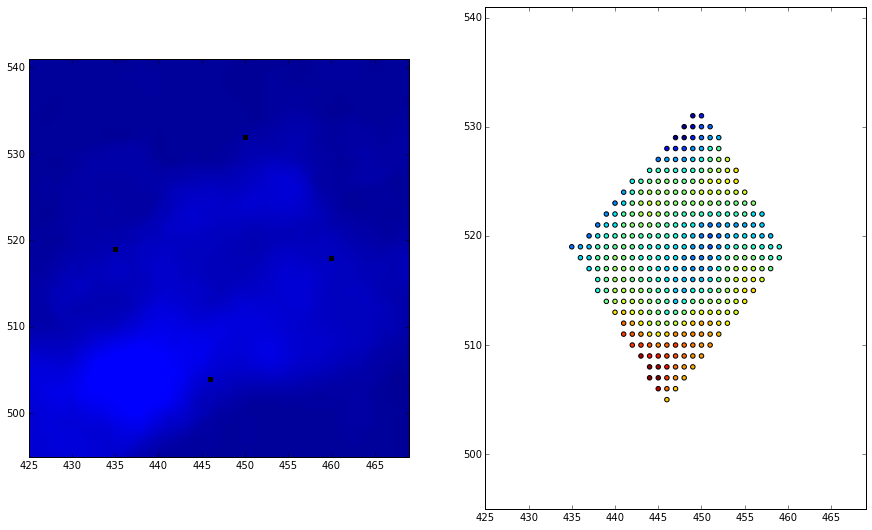

In [94]:
HI_poly_16, x_16_v, y_16_v, pix_16_x, pix_16_y = make_poly(ra_16, dec_16, pixgrid, True)

vertices are [[247, 356], [230, 363], [222, 346], [240, 340]]
median: 0.0
mean: 1.04733
vertices are [[423, 474], [403, 479], [402, 469], [421, 457]]
median: 0.0
mean: 2.07107
vertices are [[476, 545], [466, 556], [452, 544], [463, 530]]
median: 0.110176
mean: 7.50987
vertices are [[203, 368], [193, 383], [180, 371], [189, 355]]
median: 85.0443
mean: 83.6635
vertices are [[163, 385], [151, 398], [138, 391], [148, 375]]
median: 0.0
mean: 17.3269
vertices are [[137, 396], [131, 408], [117, 392], [135, 387]]
median: 66.4216
mean: 113.69
vertices are [[117, 405], [106, 420], [96, 405], [107, 395]]
median: 0.0
mean: 0.0
vertices are [[485, 200], [476, 214], [461, 209], [467, 192]]
median: 0.0
mean: 0.165144


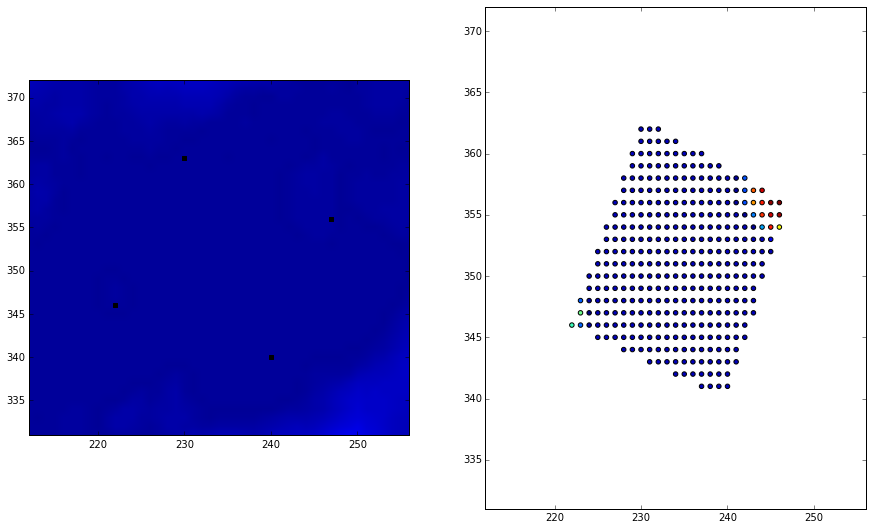

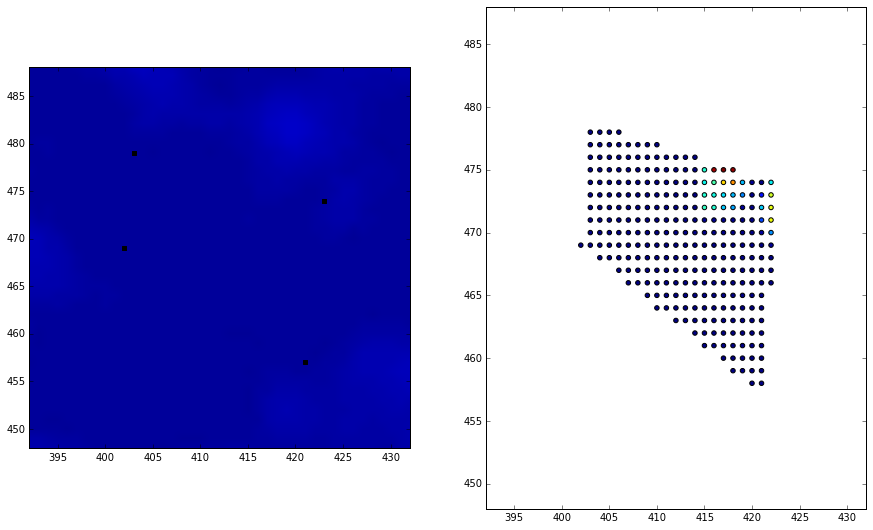

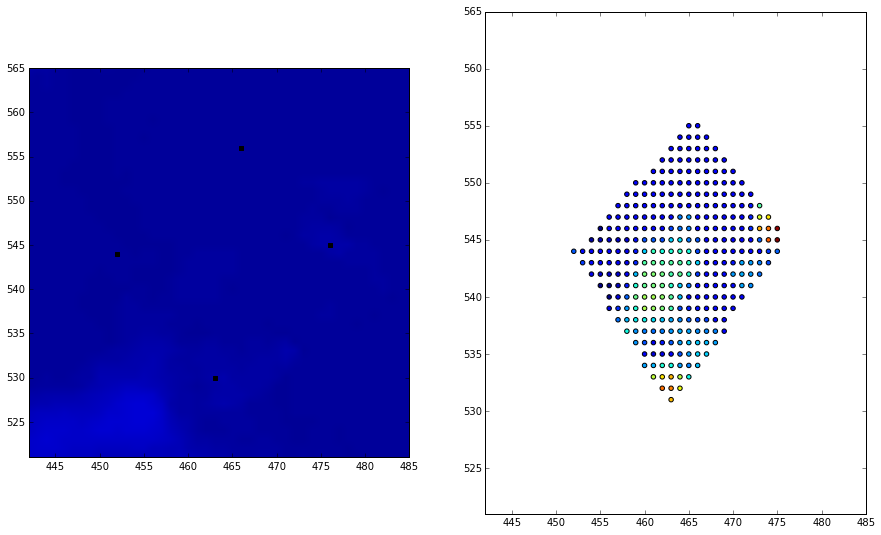

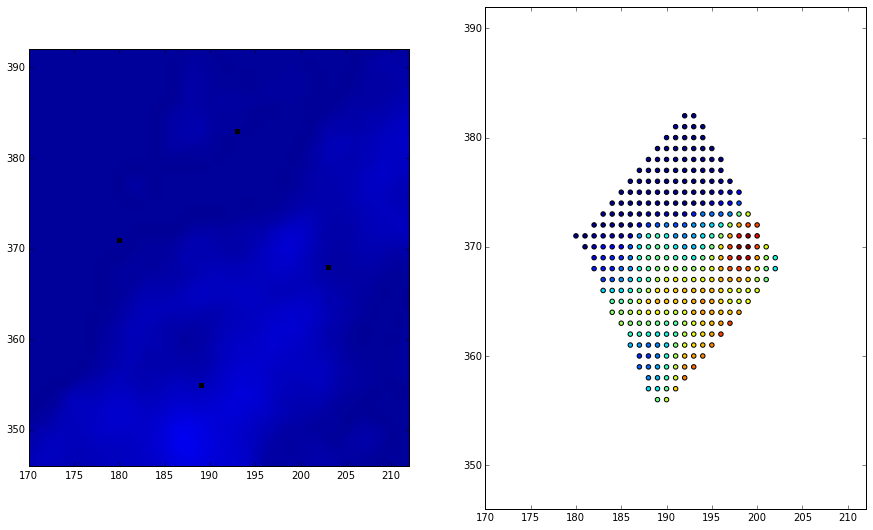

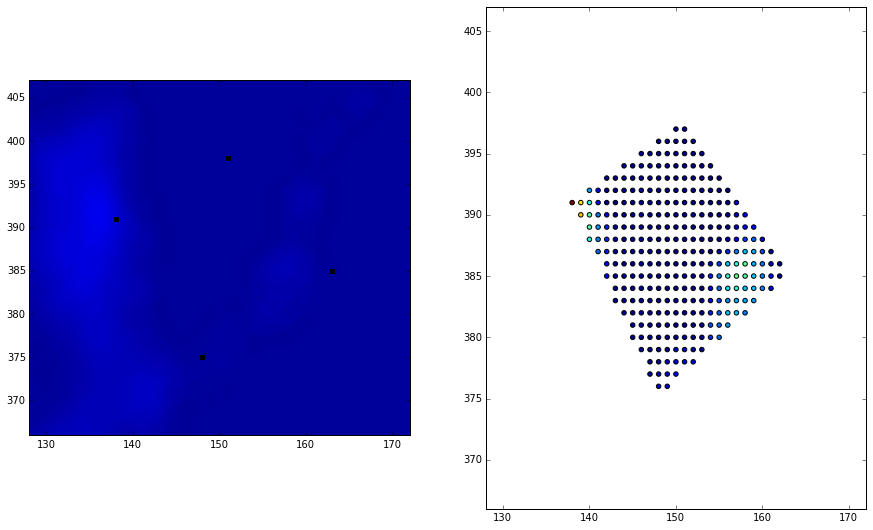

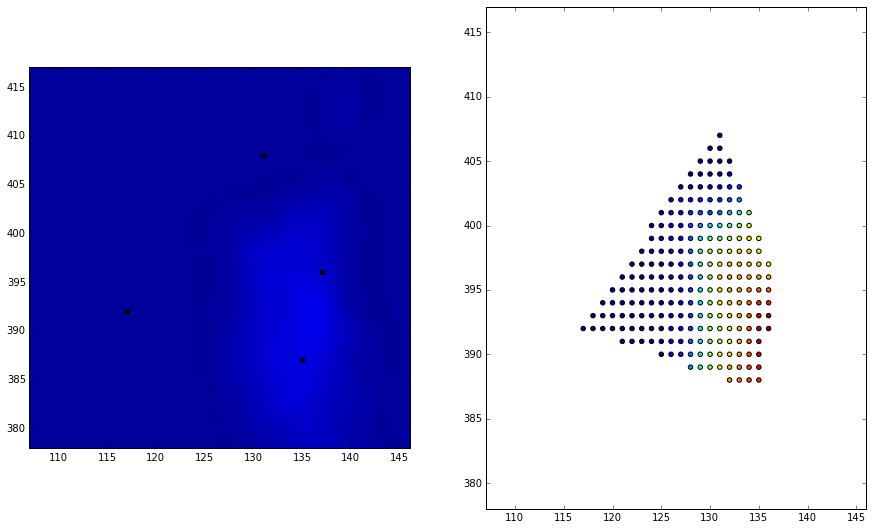

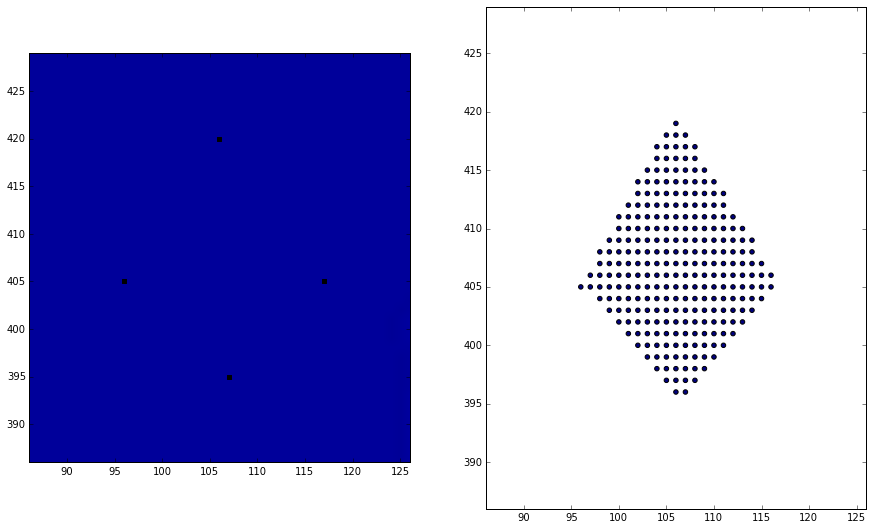

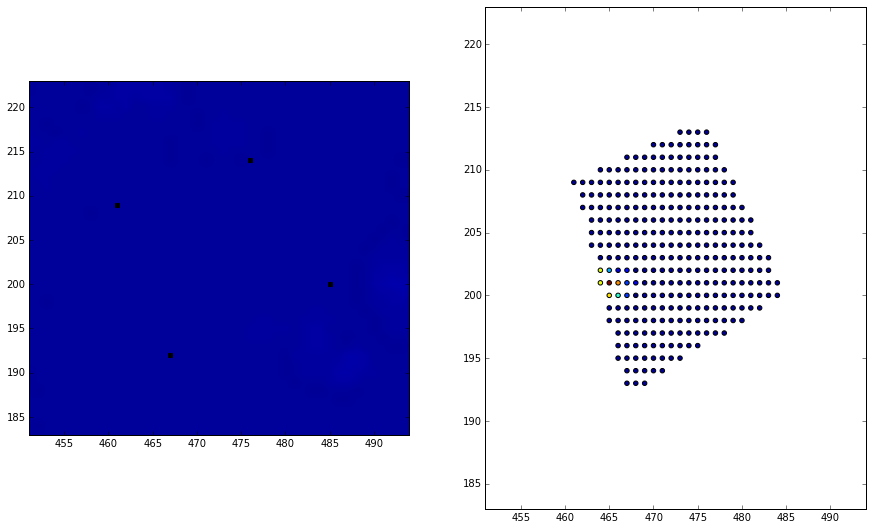

In [95]:
HI_poly_07, x_07_v, y_07_v, pix_07_x, pix_07_y = make_poly(ra_07, dec_07, pixgrid, True)
HI_poly_14, x_14_v, y_14_v, pix_14_x, pix_14_y = make_poly(ra_14, dec_14, pixgrid, True)
HI_poly_17, x_17_v, y_17_v, pix_17_x, pix_17_y = make_poly(ra_17, dec_17, pixgrid, True)
HI_poly_20, x_20_v, y_20_v, pix_20_x, pix_20_y = make_poly(ra_20, dec_20, pixgrid, True)
HI_poly_22, x_22_v, y_22_v, pix_22_x, pix_22_y = make_poly(ra_22, dec_22, pixgrid, True)
HI_poly_24, x_24_v, y_24_v, pix_24_x, pix_24_y = make_poly(ra_24, dec_24, pixgrid, True)
HI_poly_26, x_26_v, y_26_v, pix_26_x, pix_26_y = make_poly(ra_26, dec_26, pixgrid, True)
HI_poly_28, x_28_v, y_28_v, pix_28_x, pix_28_y = make_poly(ra_28, dec_28, pixgrid, True)

SF_tot_HI = (sum(HI_poly_07) + sum(HI_poly_14) + sum(HI_poly_17) + sum(HI_poly_20) + sum(HI_poly_22) + sum(HI_poly_24) + sum(HI_poly_26) + sum(HI_poly_28) )
SF_tot_size = (size(HI_poly_07) + size(HI_poly_14) + size(HI_poly_17) + size(HI_poly_20) + size(HI_poly_22) + size(HI_poly_24) + size(HI_poly_26) + size(HI_poly_28) )

###Bar Chart Land

In [116]:
briblu_03, = where (((-0.4) < (f606_03-f814_03)) & ((f606_03-f814_03) < (0.2)) & ((23) < (f814_03)) & ((f814_03) < (26.2)))
num_bb_03 = size(ra_03[briblu_03])

briblu_04, = where (((-0.4) < (f606_04-f814_04)) & ((f606_04-f814_04) < (0.2)) & ((23) < (f814_04)) & ((f814_04) < (26.2)))
num_bb_04 = size(ra_04[briblu_04])

briblu_05, = where (((-0.4) < (f606_05-f814_05)) & ((f606_05-f814_05) < (0.2)) & ((23) < (f814_05)) & ((f814_05) < (26.2)))
num_bb_05 = size(ra_05[briblu_05])

briblu_06, = where (((-0.4) < (f606_06-f814_06)) & ((f606_06-f814_06) < (0.2)) & ((23) < (f814_06)) & ((f814_06) < (26.2)))
num_bb_06 = size(ra_06[briblu_06])

briblu_08, = where (((-0.4) < (f606_08-f814_08)) & ((f606_08-f814_08) < (0.2)) & ((23) < (f814_08)) & ((f814_08) < (26.2)))
num_bb_08 = size(ra_08[briblu_08])

briblu_12, = where (((-0.4) < (f606_12-f814_12)) & ((f606_12-f814_12) < (0.2)) & ((23) < (f814_12)) & ((f814_12) < (26.2)))
num_bb_12 = size(ra_12[briblu_12])

briblu_16, = where (((-0.4) < (f606_16-f814_16)) & ((f606_16-f814_16) < (0.2)) & ((23) < (f814_16)) & ((f814_16) < (26.2)))
num_bb_16 = size(ra_16[briblu_16])

briblu_SF, = where (((-0.4) < (f606_SF-f814_SF)) & ((f606_SF-f814_SF) < (0.2)) & ((23) < (f814_SF)) & ((f814_SF) < (26.2)))
num_bb_SF = size(ra_SF[briblu_SF])

##
briblu_07, = where (((-0.4) < (f606_07-f814_07)) & ((f606_07-f814_07) < (0.2)) & ((23) < (f814_07)) & ((f814_07) < (26.2)))
num_bb_07 = size(ra_07[briblu_07])
print num_bb_07

briblu_14, = where (((-0.4) < (f606_14-f814_14)) & ((f606_14-f814_14) < (0.2)) & ((23) < (f814_14)) & ((f814_14) < (26.2)))
num_bb_14 = size(ra_14[briblu_14])
print num_bb_14

briblu_17, = where (((-0.4) < (f606_17-f814_17)) & ((f606_17-f814_17) < (0.2)) & ((23) < (f814_17)) & ((f814_17) < (26.2)))
num_bb_17 = size(ra_17[briblu_17])
print num_bb_17

briblu_20, = where (((-0.4) < (f606_20-f814_20)) & ((f606_20-f814_20) < (0.2)) & ((23) < (f814_20)) & ((f814_20) < (26.2)))
num_bb_20 = size(ra_20[briblu_20])
print num_bb_20

briblu_22, = where (((-0.4) < (f606_22-f814_22)) & ((f606_22-f814_22) < (0.2)) & ((23) < (f814_22)) & ((f814_22) < (26.2)))
num_bb_22 = size(ra_22[briblu_22])
print num_bb_22

briblu_24, = where (((-0.4) < (f606_24-f814_24)) & ((f606_24-f814_24) < (0.2)) & ((23) < (f814_24)) & ((f814_24) < (26.2)))
num_bb_24 = size(ra_24[briblu_24])
print num_bb_24

briblu_26, = where (((-0.4) < (f606_26-f814_26)) & ((f606_26-f814_26) < (0.2)) & ((23) < (f814_26)) & ((f814_26) < (26.2)))
num_bb_26 = size(ra_26[briblu_26])
print num_bb_26

briblu_28, = where (((-0.4) < (f606_28-f814_28)) & ((f606_28-f814_28) < (0.2)) & ((23) < (f814_28)) & ((f814_28) < (26.2)))
num_bb_28 = size(ra_28[briblu_28])
print num_bb_28

2
6
2
3
1
2
2
2


In [126]:
size_field = 11.72 #square kpc
num_fields_in_SF = 8.0
num_bb_SF_per_field = (num_bb_SF/num_fields_in_SF)

num_bb = np.hstack([num_bb_03, num_bb_04, num_bb_05, num_bb_06, num_bb_08, num_bb_12, num_bb_16, num_bb_SF_per_field])
num_bb_tuple = tuple(num_bb)
bb_per_kpc2 = num_bb / (size_field)
bb_per_kpc2_tuple = tuple(bb_per_kpc2)
HI_mean = np.hstack([mean(HI_poly_03), mean(HI_poly_04), mean(HI_poly_05), mean(HI_poly_06), mean(HI_poly_08), mean(HI_poly_12), mean(HI_poly_16), (SF_tot_HI/SF_tot_size)])
HI_mean_tuple = tuple(HI_mean)
HI_per_kpc2 = (HI_mean*pix_weight)/pix_size_kpc2
HI_per_kpc2_tuple = tuple(HI_per_kpc2)
HI_dens = dens_coef*HI_per_kpc2
HI_dens_tuple = tuple(HI_dens)

HI_per_kpc2 = (HI_mean*pix_weight)/pix_size_kpc2
HI_per_kpc2_tuple = (HI_mean_tuple*pix_weight)/pix_size_kpc2
#print HI_per_kpc2_tuple

HI_dens = dens_coef*HI_per_kpc2
HI_dens_tuple = dens_coef*HI_per_kpc2_tuple
#print HI_dens_tuple


HI_per_kpc2_con = (HI_mean_con*pix_weight)/pix_size_kpc2
HI_per_kpc2_con_tuple = (HI_mean_con_tuple*pix_weight)/pix_size_kpc2
#print HI_per_kpc2_con_tuple

HI_dens_con = dens_coef*HI_per_kpc2_con
HI_dens_con_tuple = dens_coef*HI_per_kpc2_con_tuple
#print HI_dens_con_tuple


HI_per_kpc2_w_con = (HI_mean_w_con*pix_weight)/pix_size_kpc2
HI_per_kpc2_w_con_tuple = (HI_mean_w_con_tuple*pix_weight)/pix_size_kpc2
#print HI_per_kpc2_w_con_tuple

HI_dens_w_con = dens_coef*HI_per_kpc2_w_con
HI_dens_w_con_tuple = dens_coef*HI_per_kpc2_w_con_tuple
#print HI_dens_w_con_tuple

In [98]:
def autolabel_d(allplots):
    """
    Attach a text label above each bar displaying its height
    """
    for eachplot in allplots:
        height = eachplot.get_height()
        text(eachplot.get_x() + eachplot.get_width()/2., height+.05,
                '%d' % height,
                ha='center', va='bottom')

def autolabel_f3(allplots):
    """
    Attach a text label above each bar displaying its height
    """
    for eachplot in allplots:
        height = eachplot.get_height()
        text(eachplot.get_x() + eachplot.get_width()/2., height+.05,
                '%.3f' % height,
                ha='center', va='bottom')

def autolabel_f1(allplots):
    """
    Attach a text label above each bar displaying its height
    """
    for eachplot in allplots:
        height = eachplot.get_height()
        text(eachplot.get_x() + eachplot.get_width()/2., height+.05,
                '%.1f' % height,
                ha='center', va='bottom')

def autolabel_BB_s(allplots):
    """
    Attach a text label above each bar displaying its height
    """
    for eachplot in allplots:
        height = eachplot.get_height()# * 100
        text(eachplot.get_x() + eachplot.get_width()/2, height+.05,
                '%.1f' % height,
                ha='center', va='bottom', rotation=90)

def autolabel_HI_s(allplots):
    """
    Attach a text label above each bar displaying its height
    """
    for eachplot in allplots:
        height = eachplot.get_height()
        text(eachplot.get_x() + eachplot.get_width()/2, height+.05,
                '%.1f' % height,
                ha='center', va='bottom', rotation=90)

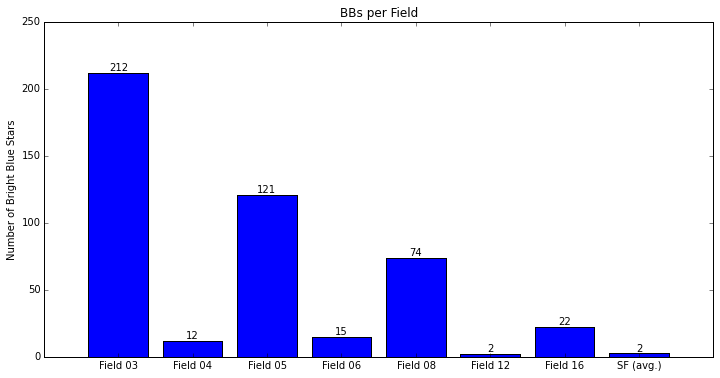

In [134]:
figure(figsize(12,6))

N = np.size(num_bb_tuple)
ind = np.arange(N)    # the x locations for the groups

p1 = plt.bar(ind, num_bb_tuple, align = 'center', color='b')

plt.ylabel('Number of Bright Blue Stars')
plt.title('BBs per Field')

plt.xticks(ind, ('Field 03', 'Field 04','Field 05','Field 06','Field 08','Field 12','Field 16','SF (avg.)'))

autolabel_d(p1)

plt.show()

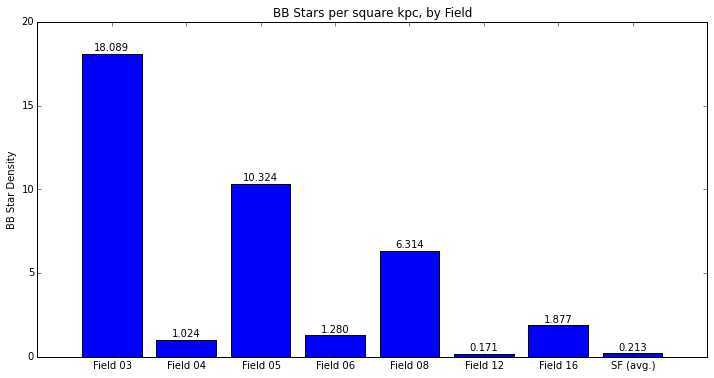

In [135]:
figure(figsize(12,6))

N = np.size(bb_per_kpc2_tuple)
ind = np.arange(N)    # the x locations for the groups

p1 = plt.bar(ind, bb_per_kpc2_tuple, align='center', color='b')

plt.ylabel('BB Star Density')
plt.title('BB Stars per square kpc, by Field')
plt.xticks(ind, ('Field 03', 'Field 04','Field 05','Field 06','Field 08','Field 12','Field 16','SF (avg.)'))

autolabel_f3(p1)

plt.show()

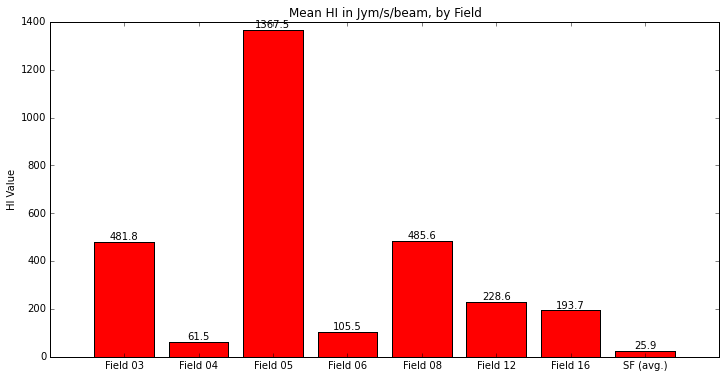

In [136]:
figure(figsize(12,6))

N = np.size(HI_mean_tuple)
ind = np.arange(N)    # the x locations for the groups

p1 = plt.bar(ind, HI_mean_tuple, align='center', color='r')

plt.ylabel('HI Value')
plt.title('Mean HI in Jym/s/beam, by Field')
plt.xticks(ind, ('Field 03', 'Field 04','Field 05','Field 06','Field 08','Field 12','Field 16','SF (avg.)'))

autolabel_f1(p1)

plt.show()

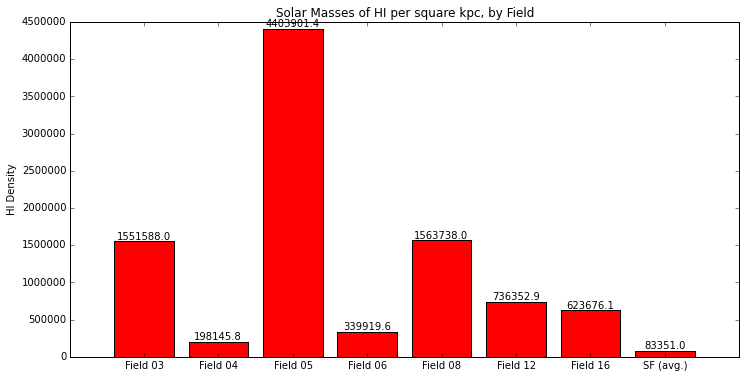

In [137]:
figure(figsize(12,6))

N = np.size(HI_dens_tuple)
ind = np.arange(N)    # the x locations for the groups

p1 = plt.bar(ind, (HI_dens_tuple), align='center', color='r')

plt.ylabel('HI Density')
plt.title('Solar Masses of HI per square kpc, by Field')
plt.xticks(ind, ('Field 03', 'Field 04','Field 05','Field 06','Field 08','Field 12','Field 16','SF (avg.)'))

autolabel_f1(p1)

plt.show()

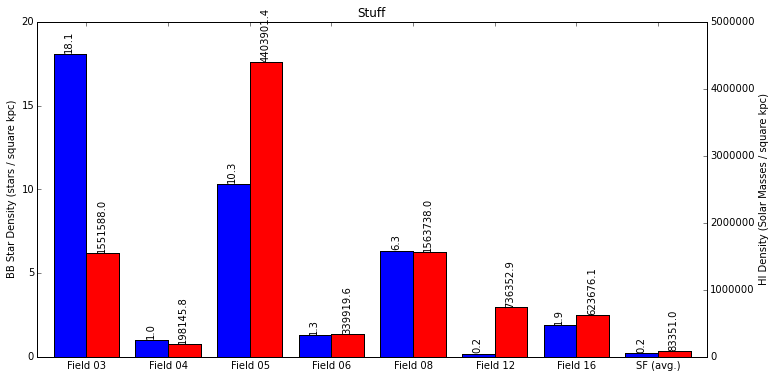

In [138]:
fig = plt.figure()
figsize(12,6)
ax = fig.add_subplot(111)
width = 0.4                      # the width of the bars

NBB = np.size(bb_per_kpc2_tuple)
indBB = np.arange(N)    # the x locations for the groups

p1BB = ax.bar(ind-width/2, bb_per_kpc2_tuple, width, align='center', color='b')

ax.set_ylabel('BB Star Density (stars / square kpc)')
ax.set_ylim(0, 20)
autolabel_BB_s(p1BB)


ax2 = ax.twinx()

NHI = np.size(HI_dens_tuple)
indHI = np.arange(N)    # the x locations for the groups

p1HI = plt.bar(ind+width/2, (HI_dens_tuple), width, align='center', color='r')

ax2.set_ylabel('HI Density (Solar Masses / square kpc)')
ax2.set_ylim(0, 5000000)
autolabel_HI_s(p1HI)


ax.set_title('Stuff')
xTickMarks = ('Field 03', 'Field 04','Field 05','Field 06','Field 08','Field 12','Field 16','SF (avg.)')
ax.set_xticks(ind)
xtickNames = ax.set_xticklabels(xTickMarks)
ax.set_xlim(0-width*1.5,len(ind)-1+width*1.5)


##plt.setp(xtickNames, rotation=90, fontsize=10)

plt.show()

In [127]:
bb_err = (np.sqrt(num_bb)/size_field)
SF_err = (np.sqrt(num_bb_SF)/(size_field*num_fields_in_SF))
bb_err[-1] = SF_err

HI_err = HI_dens_tuple

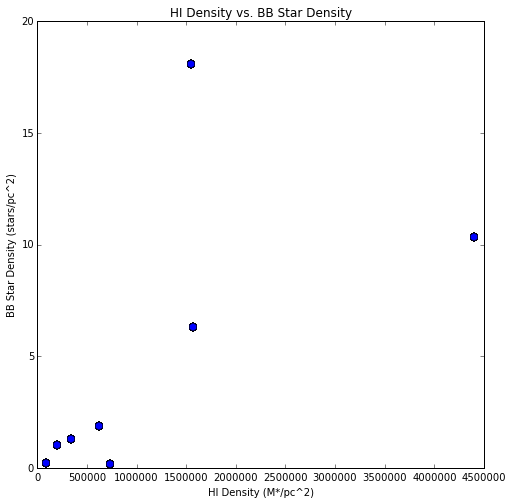

In [139]:
figure(figsize(8,8))

plot(HI_dens_tuple*1000*1000, bb_per_kpc2_tuple*1000*1000, 'bh', ms=8)

plt.title('HI Density vs. BB Star Density')
plt.xlabel('HI Density (M*/pc^2)')
plt.ylabel('BB Star Density (stars/pc^2)')

plt.show()

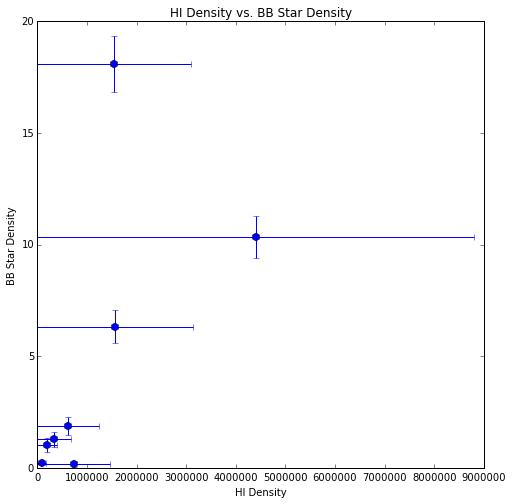

In [131]:
figure(figsize(8,8))

errorbar(x=HI_dens_tuple, y=bb_per_kpc2_tuple, xerr=HI_err, yerr=bb_err, fmt='bh', ms=8)

plt.title('HI Density vs. BB Star Density')
plt.xlabel('HI Density (M*/kpc^2)')
plt.ylabel('BB Star Density (stars/kpc^2)')

plt.show()

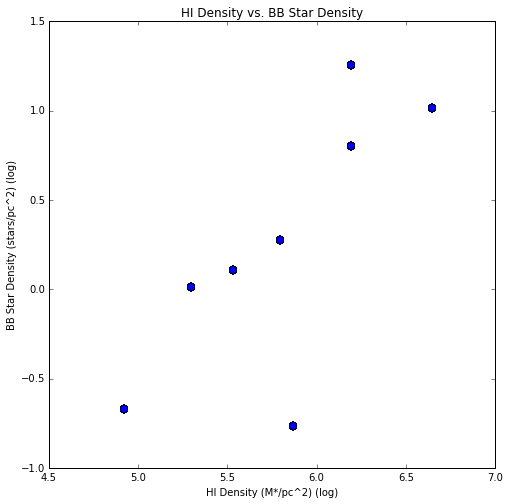

In [140]:
figure(figsize(8,8))

plot(np.log10(HI_dens_tuple*1000*1000), np.log10(bb_per_kpc2_tuple*1000*1000), 'bh', ms=8)

plt.title('HI Density vs. BB Star Density')
plt.xlabel('HI Density (M*/pc^2) (log)')
plt.ylabel('BB Star Density (stars/pc^2) (log)')

plt.show()

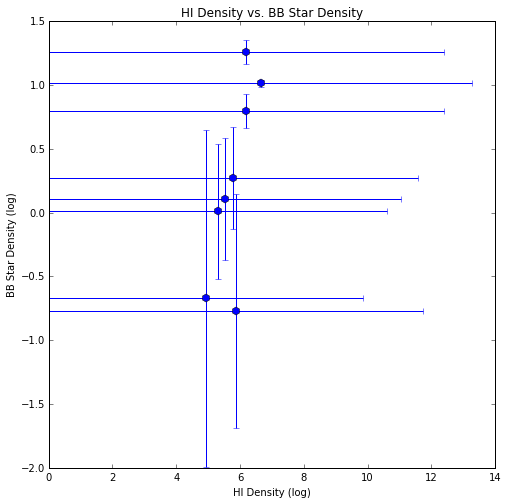

In [133]:
figure(figsize(8,8))

errorbar(x=np.log10(HI_dens_tuple), y=np.log10(bb_per_kpc2_tuple), xerr=np.log10(HI_err), yerr=np.log10(bb_err), fmt='bh', ms=8)

plt.title('HI Density vs. BB Star Density')
plt.xlabel('HI Density (M*/kpc^2) (log)')
plt.ylabel('BB Star Density (stars/kpc^2) (log)')

plt.show()

#OLDER WORK BELOW

In [108]:
#figure(figsize(12,6))

#plt.subplot(1,2,1)
#plot(f606_out-f814_out,f814_out, 'ko', alpha=0.25)   # alpha=0.05 is to make it partly transparent; 'ko' is a black circle
#axis([-1,2.5,27,23])  # this sets up the axes, and the next one the labels
#xlabel('F606W-F814W')
#ylabel('F814W')
#plt.title('Outer CMD (all)')

#plt.subplot(1,2,2)

figure(figsize(6,6))

plot((f606_out-f814_out)[bribluout],f814_out[bribluout], 'bo', alpha=0.55)   # alpha=0.05 is to make it partly transparent; 'ko' is a black circle
plot((f606_out-f814_out),f814_out, 'ro', alpha=0.15)
x1 = -0.4
x2 = 0.2
y1 = 27
y2 = 23
plot((x1,x2),(y1,y1),'b-')
plot((x1,x2),(y2,y2),'b-')
plot((x1,x1),(y1,y2),'b-')
plot((x2,x2),(y1,y2),'b-')
axis([-1,2.5,27.25,22.75])  # this sets up the axes, and the next one the labels
xlabel('F606W-F814W')
ylabel('F814W')
plt.title('Outer CMD ("Blue" Parameters Shown)')

plt.savefig('Outer_CMD_blue_parameters_shown.png', dpi= 500, facecolor='w', bbox_inches= "tight", format='png', transparent=True)

NameError: name 'f606_out' is not defined

In [ ]:
print size( f814_out[bribluout] )
print size( (f606_out-f814_out)[bribluout] )

print f814_out[bribluout]

In [ ]:
ra_outblue = hstack([ra_out[bribluout]])
dec_outblue = hstack([dec_out[bribluout]])

scoords_outblue = SkyCoord(ra_outblue,
                   dec_outblue,
                   unit=(u.deg, u.deg), frame='icrs')

ra_inblue = hstack([ra_in[bribluin]])
dec_inblue = hstack([dec_in[bribluin]])

scoords_inblue = SkyCoord(ra_inblue,
                   dec_inblue,
                   unit=(u.deg, u.deg), frame='icrs')

In [ ]:
sc1950_out = scoords_outblue.transform_to(FK4)
fig_out = aplpy.FITSFigure('M81HIM0.FITS')
fig_out.show_grayscale()
#fig_out.set_theme('pretty')
fig_out.show_circles(sc1950_out.ra.deg,sc1950_out.dec.deg,1./150.,facecolor='cyan',edgecolor='blue')
fig_out.add_grid()
filename = "HI_FITS_Map_and_Stars.png"
fig_out.save(filename, dpi=500, transparent=True, adjust_bbox=True, format='png')

#sc1950_in = scoords_inblue.transform_to(FK4)
#fig_in = aplpy.FITSFigure('M81HIM0.FITS')
#fig_in.show_grayscale()
#fig_in.show_circles(sc1950_in.ra.deg,sc1950_in.dec.deg,10./3600.,facecolor='cyan',edgecolor='cyan')
#fig_in.add_grid()

Plot colour-mag of outer fields. Some, less dense, etc. $\checkmark$

$\space \space \space \space \space$ Look at those fields' images

$\space \space \space \space \space$ Compare cmag to field 8, something like it [choose 6] $\checkmark$

Do same plots for M83

(clean up the colours in the above plot) $\checkmark$

CMD for MiASs and control $\checkmark$

Field 16 $\checkmark$

Field 12 $\checkmark$